# Data Visual 6,7,8 – ITE Student Courses and Cohort Numbers

## Step 1 - Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import os

## Step 2 - Connect to SQL Database and Retrieve Data Table

In [3]:
# Database connection configuration
db_config = {
    'user': 'weaver',  
    'password': 'web101SG',  
    'host': 'localhost',
    'database': 'dbsingaporepoly',  
}

# Establish a connection to the database
conn = mysql.connector.connect(**db_config)

# Query to load the processed data from the MySQL table
query = "SELECT * FROM iteintakeenrolmentandgraduatesbycourse_processed"

# Load the data into a pandas DataFrame
data = pd.read_sql(query, conn)

# Close the database connection
conn.close()

C:\Users\wrait\AppData\Local\Temp\ipykernel_5544\25910958.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


## Step 3 - Setup Variables

In [4]:
# Set the style of seaborn
sns.set(style="whitegrid")

# List of unique years
years = data['year'].unique()

# Directory to save the plots
output_dir = "../2_Charts"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## Step 4 - Plot the bar charts - for Enrolment

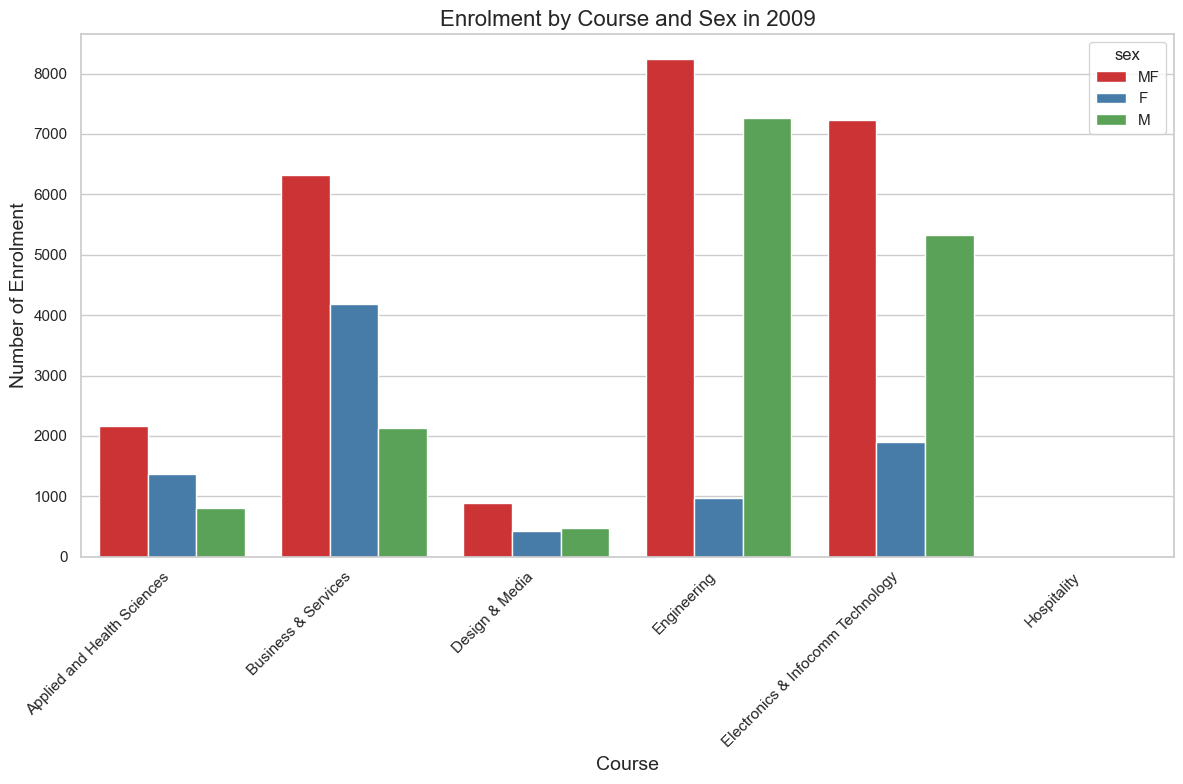

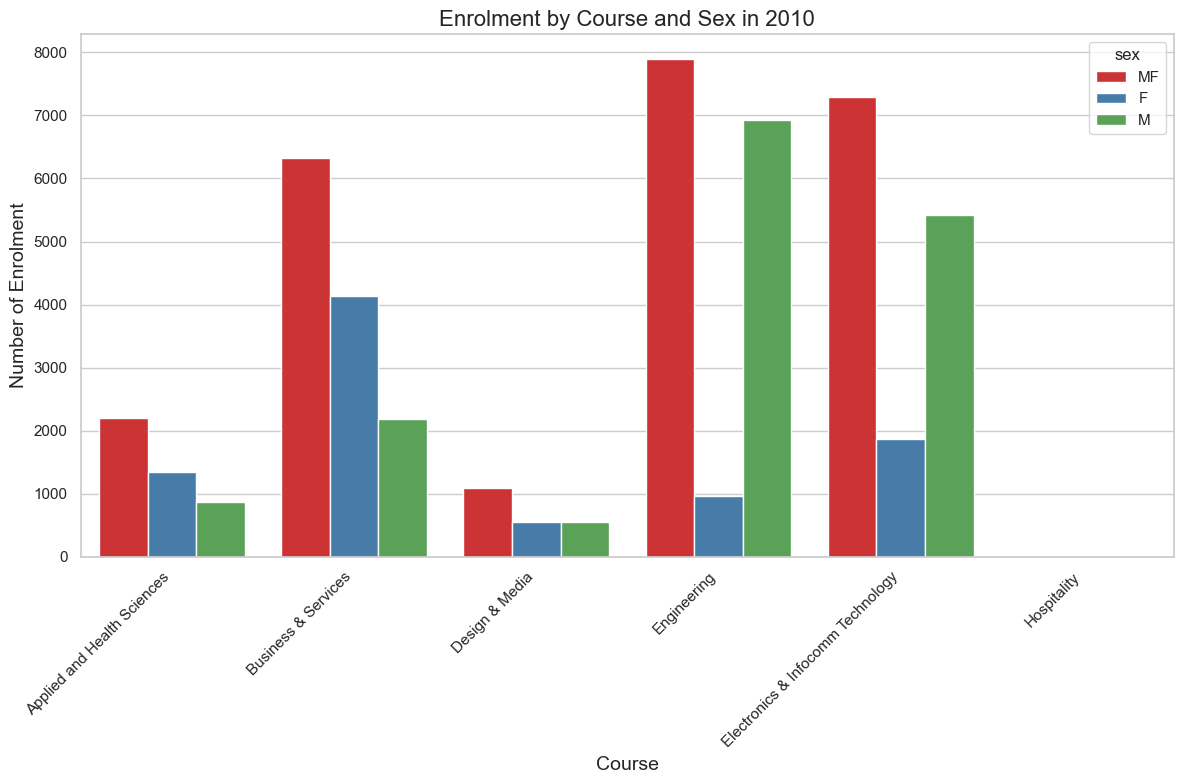

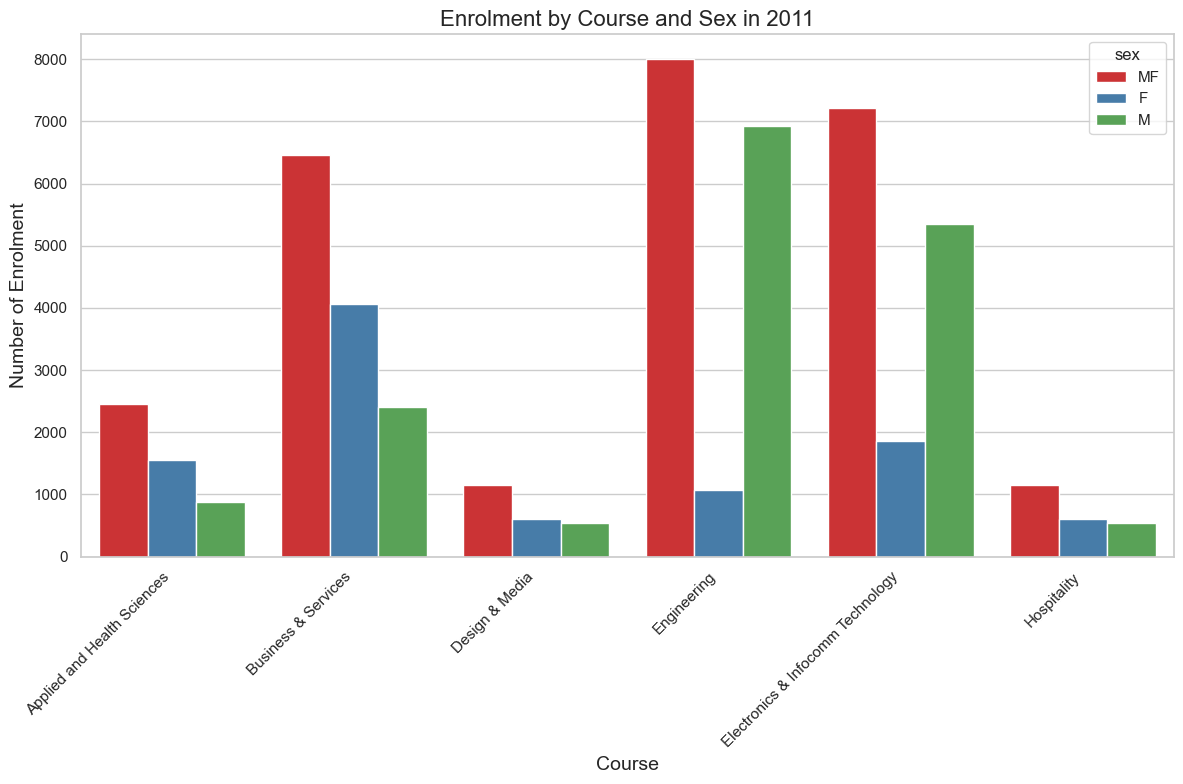

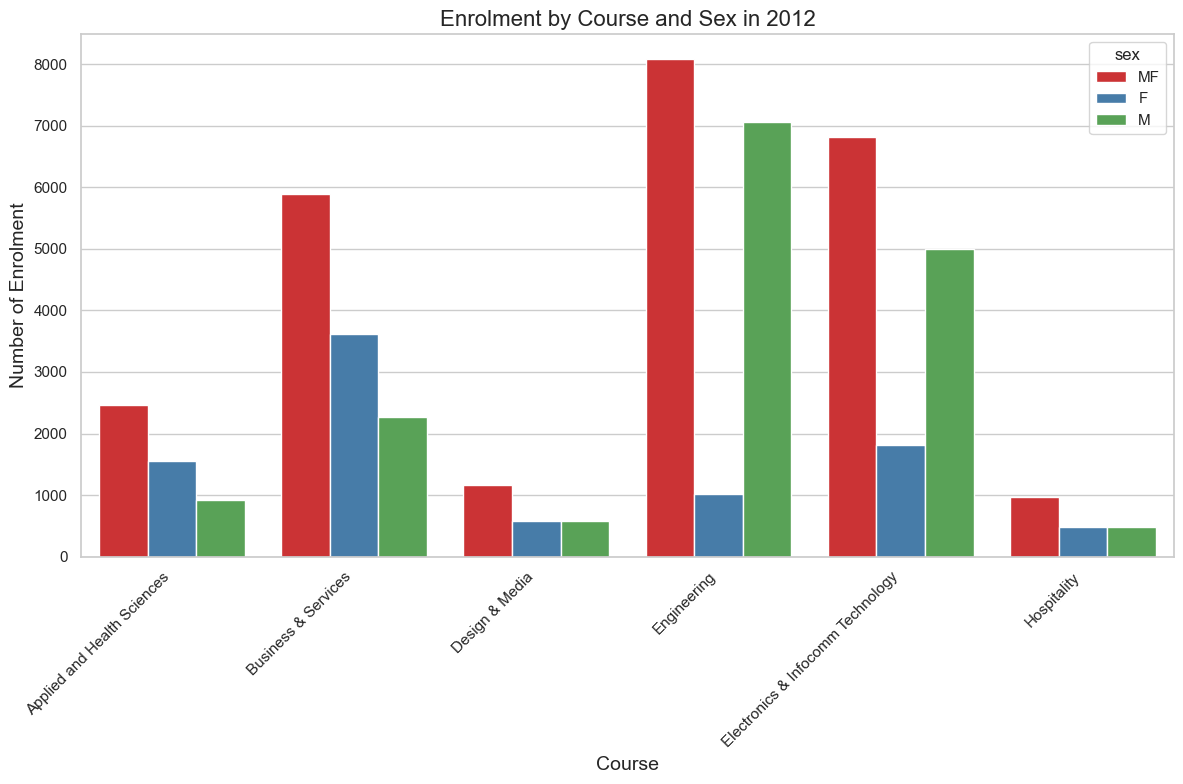

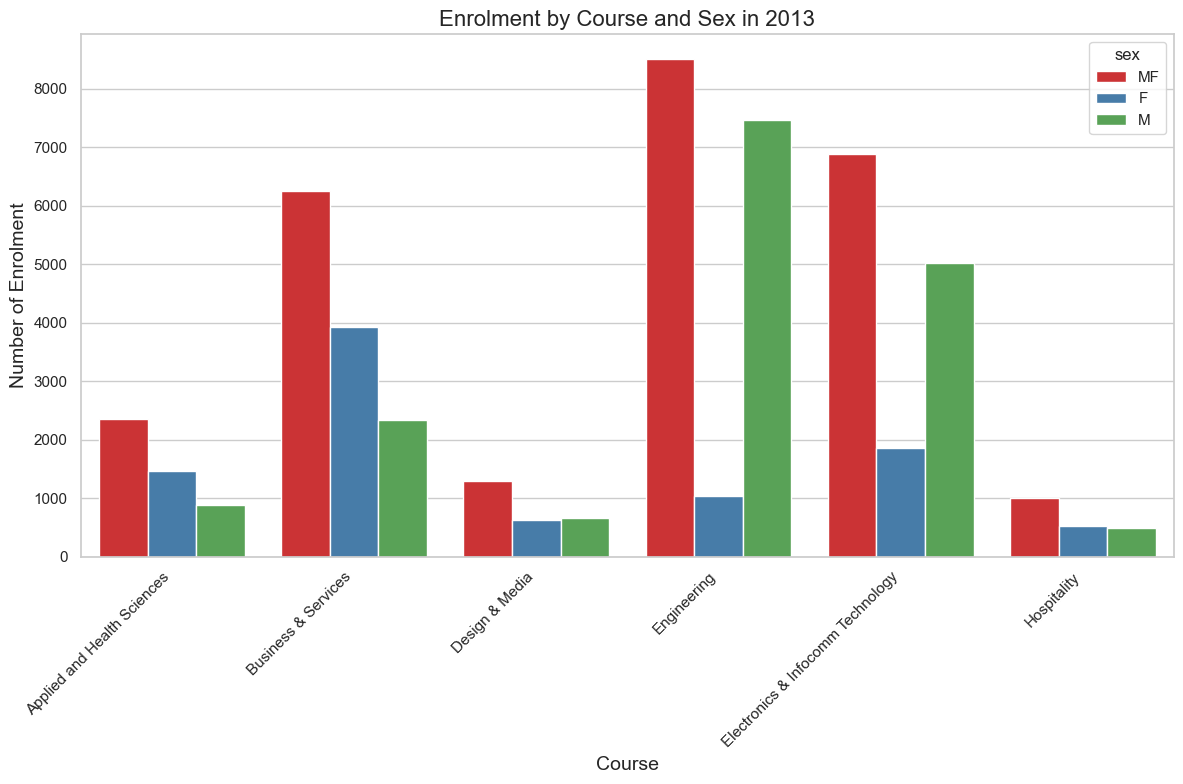

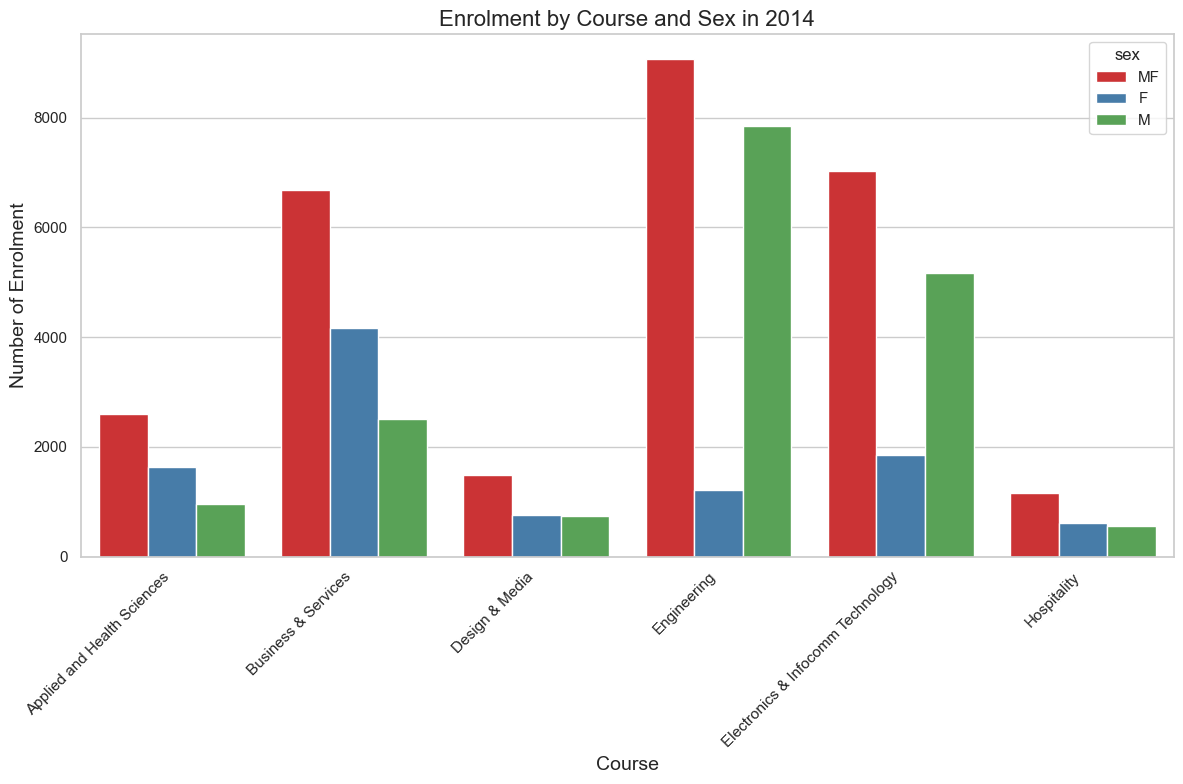

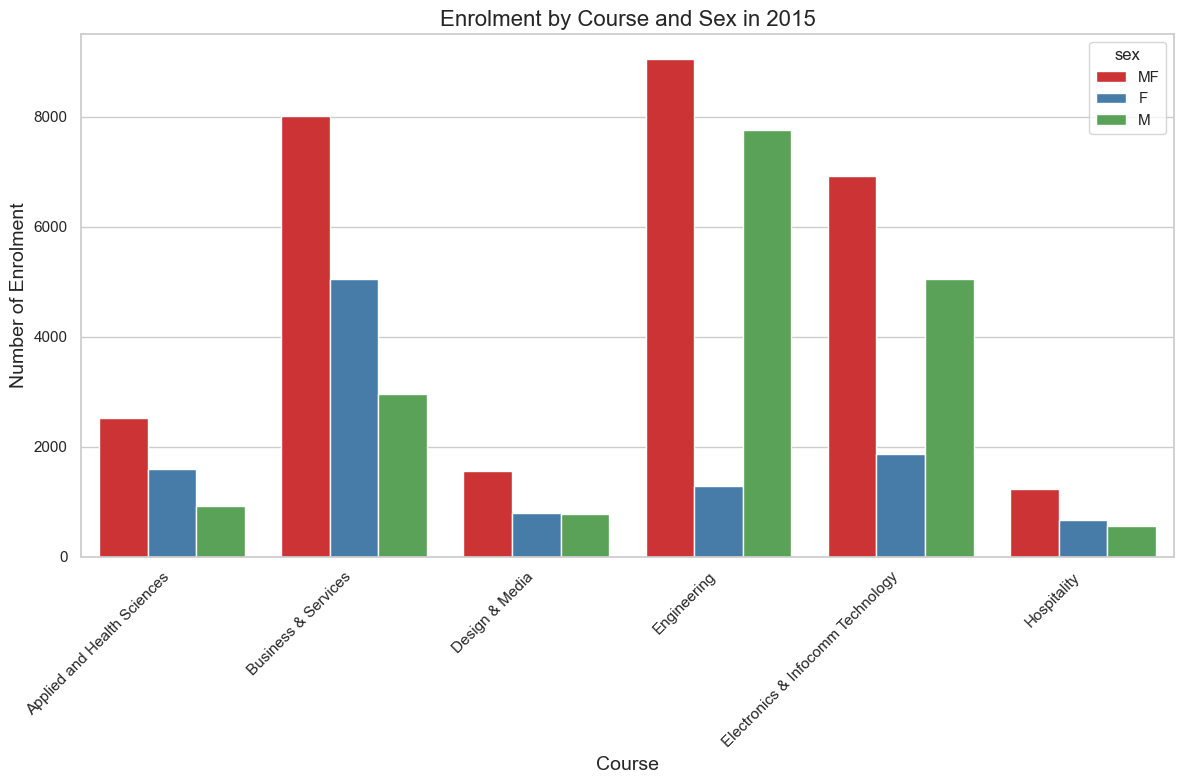

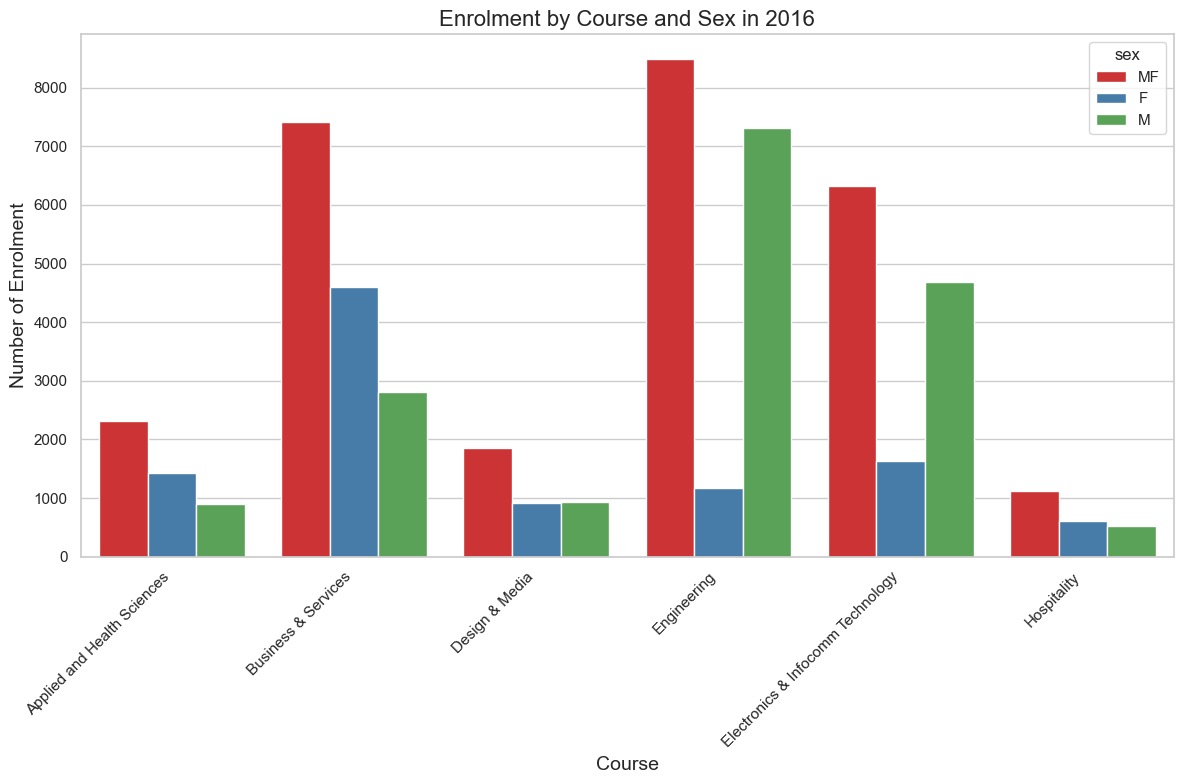

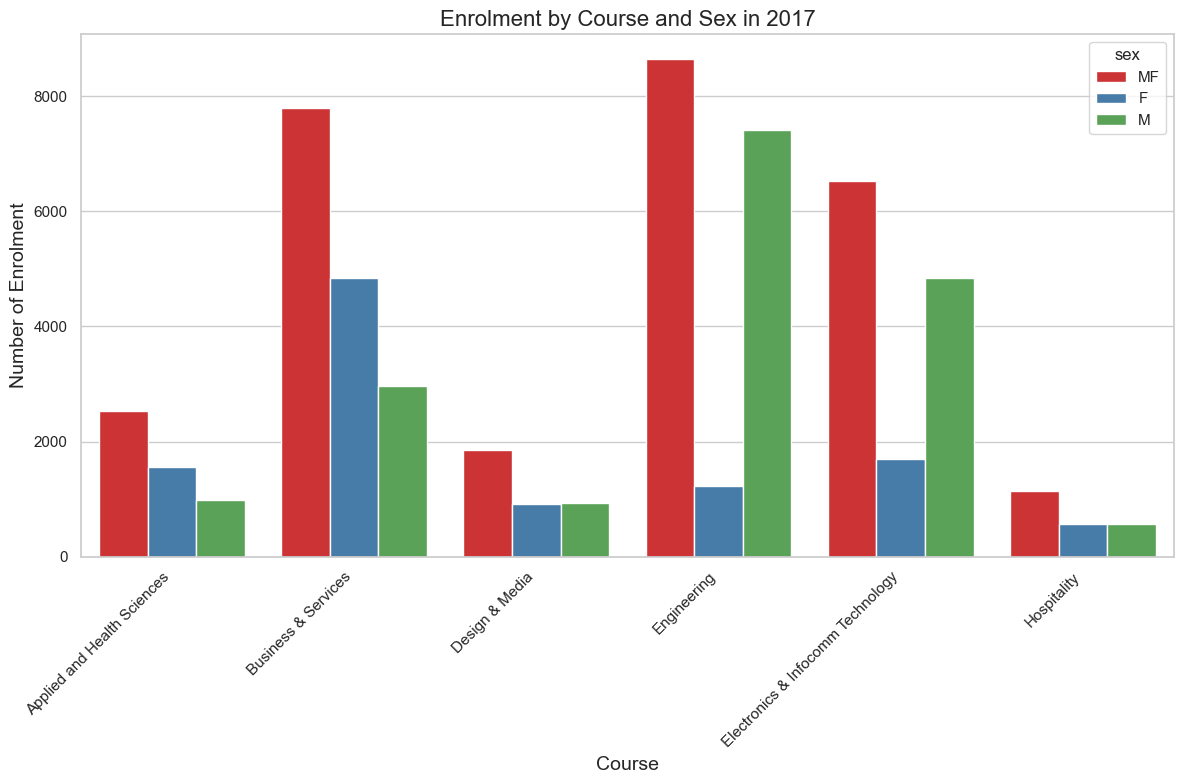

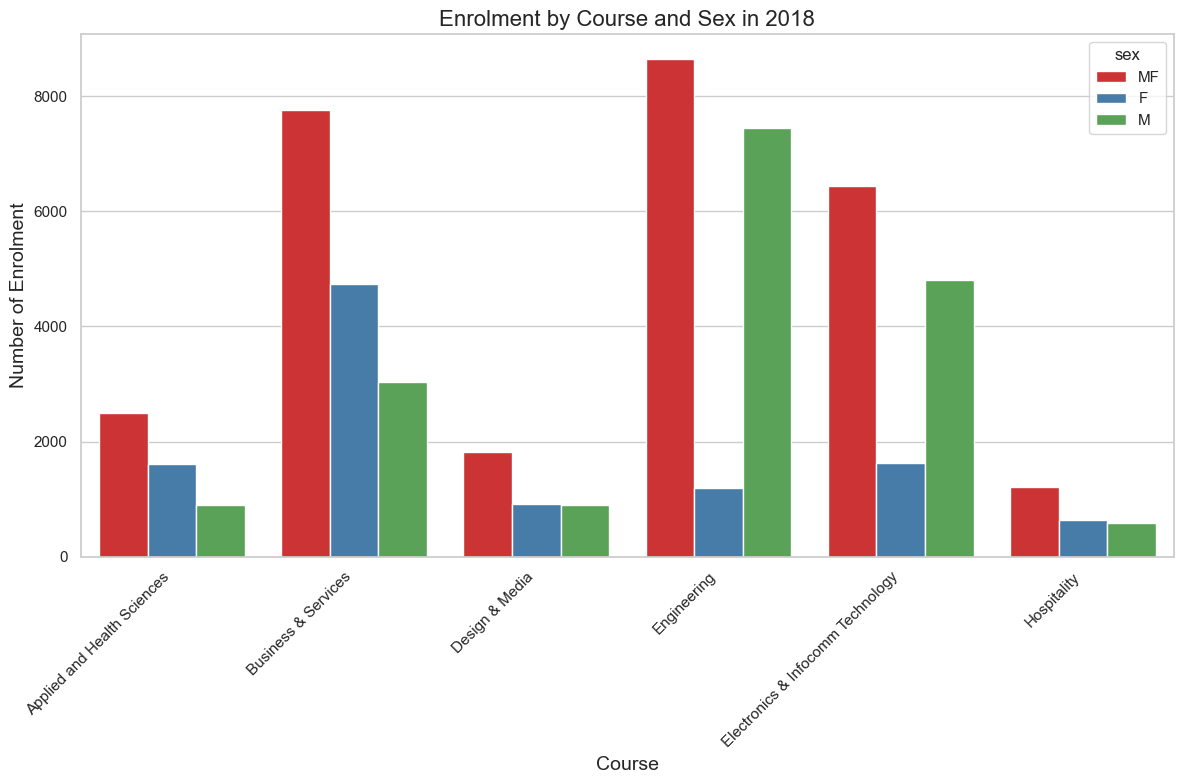

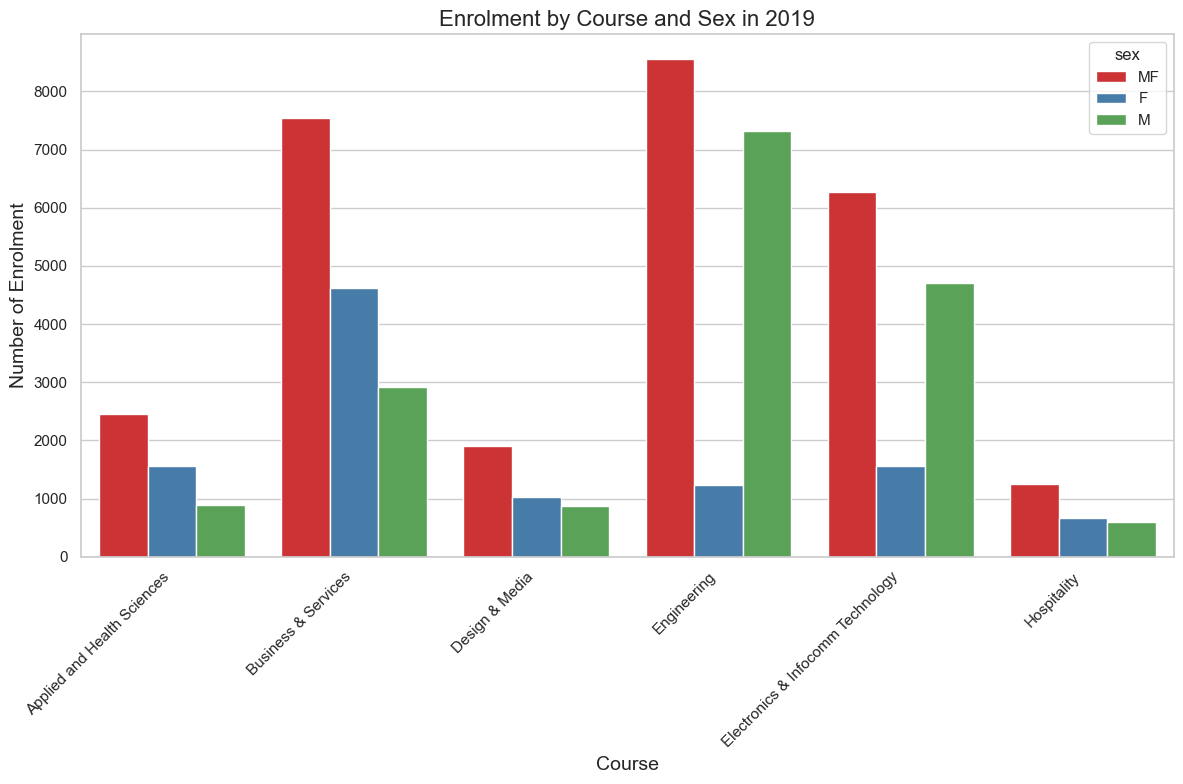

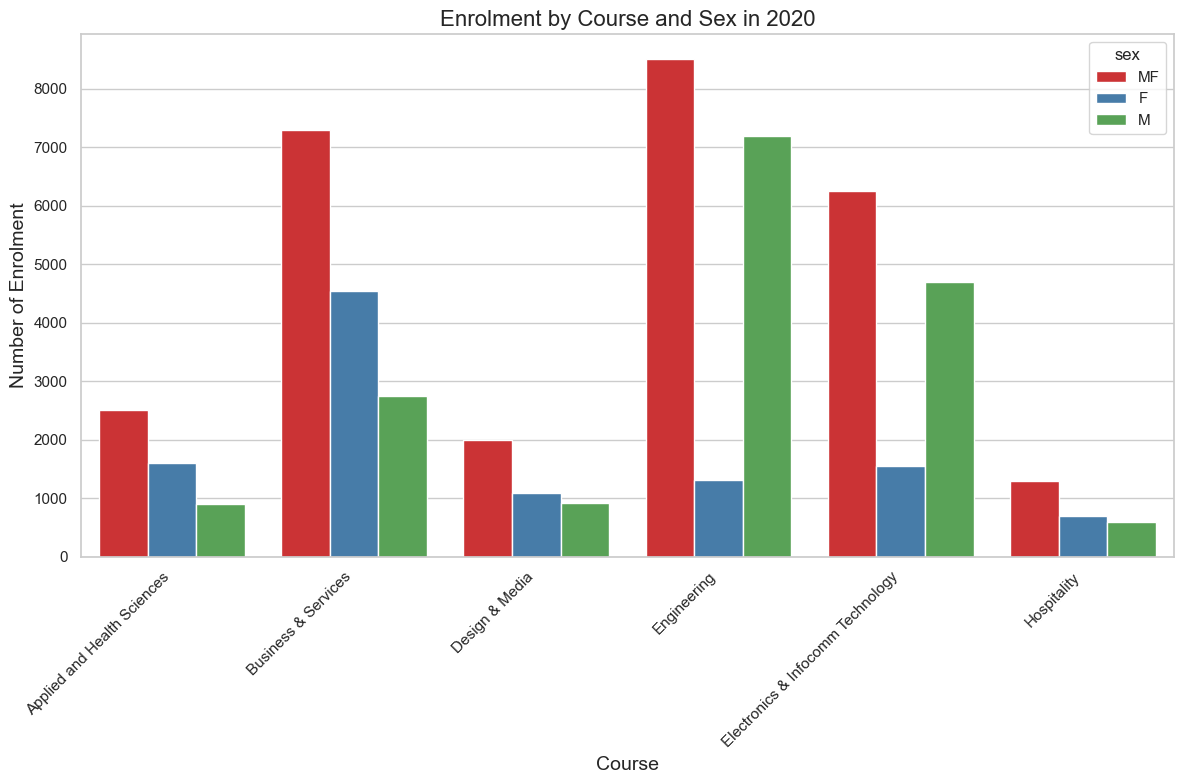

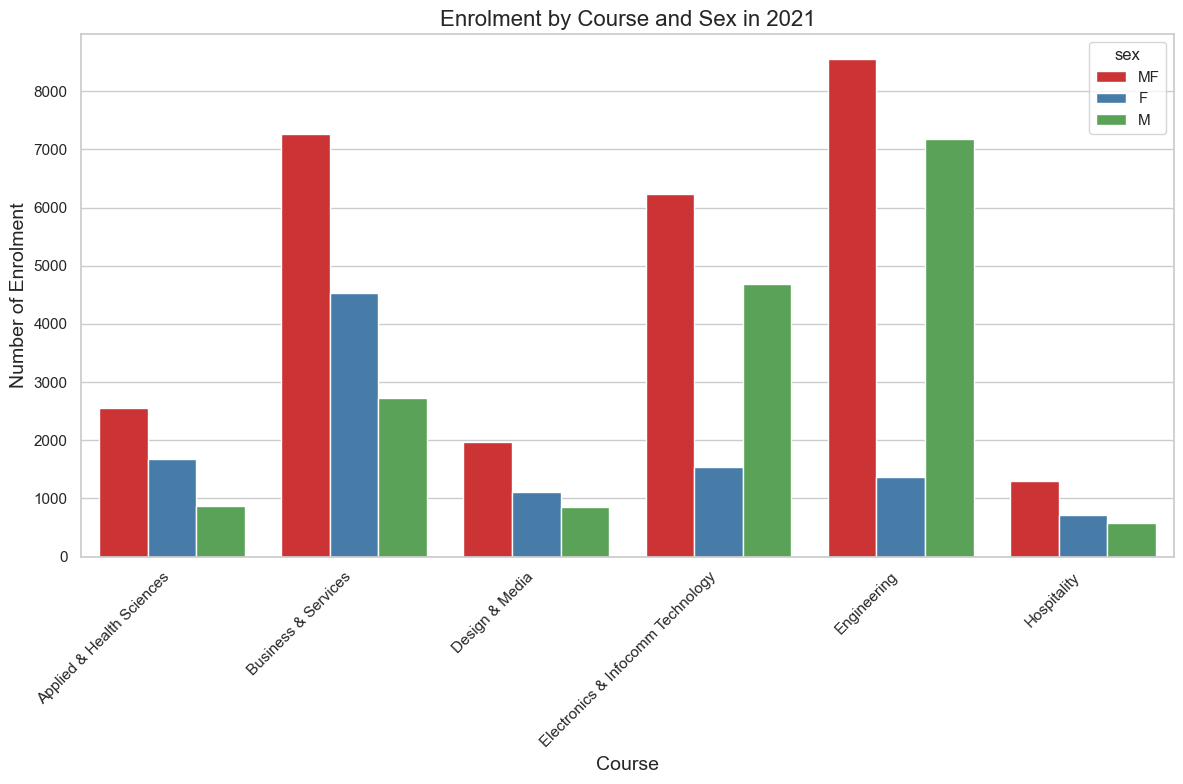

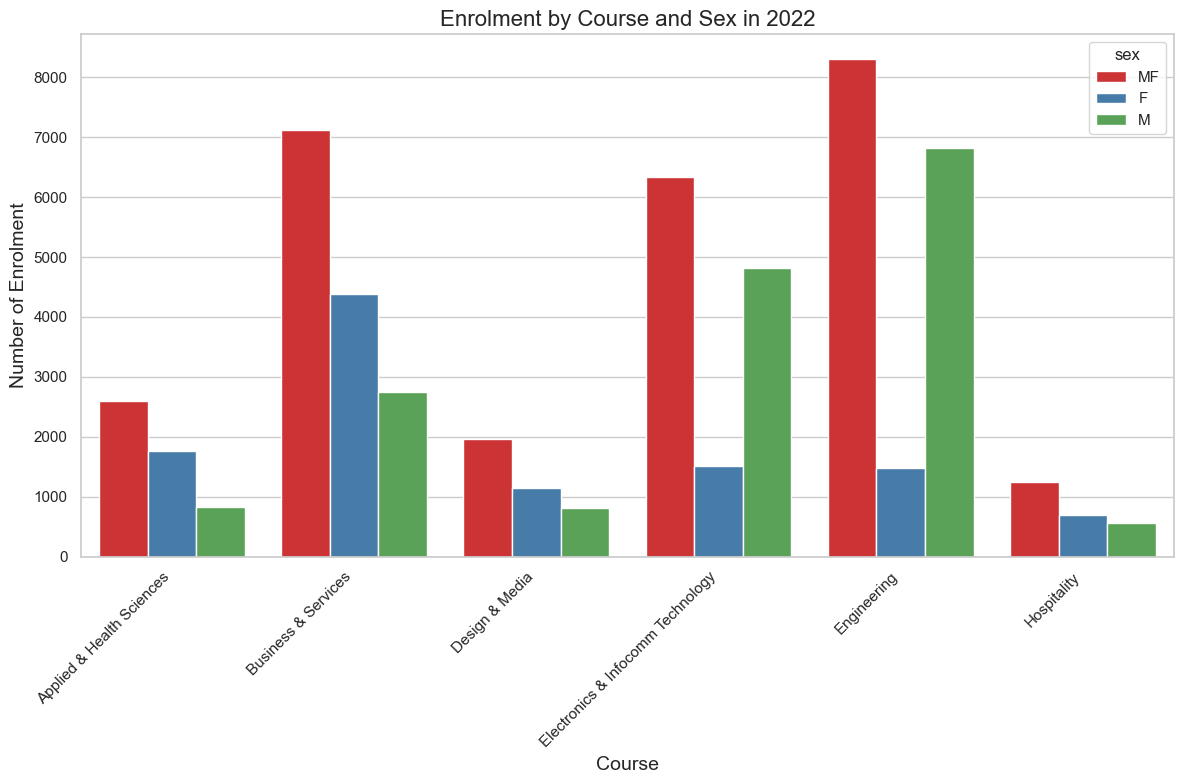

In [5]:
# Iterate over each year to create bar charts
for year in years:
    # Filter data for the specific year
    data_year = data[data['year'] == year]

    # Melt the data to have only graduates as a variable
    data_melted = pd.melt(data_year, id_vars=['course', 'sex'], value_vars=['enrolment'],
                          var_name='Category', value_name='Count')

    # Create a bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x='course', y='Count', hue='sex', data=data_melted, palette='Set1', errorbar=None)

    # Set the title and labels
    plt.title(f'Enrolment by Course and Sex in {year}', fontsize=16)
    plt.xlabel('Course', fontsize=14)
    plt.ylabel('Number of Enrolment', fontsize=14)
    plt.xticks(rotation=45, ha="right")

    # Save the plot as a JPEG file
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'enrolment_{year}.jpg'), format='jpg', dpi=300)
    
    
    # Show the plot
    plt.tight_layout()
    plt.show()

## Step 5 - Plot the bar charts - for Graduates

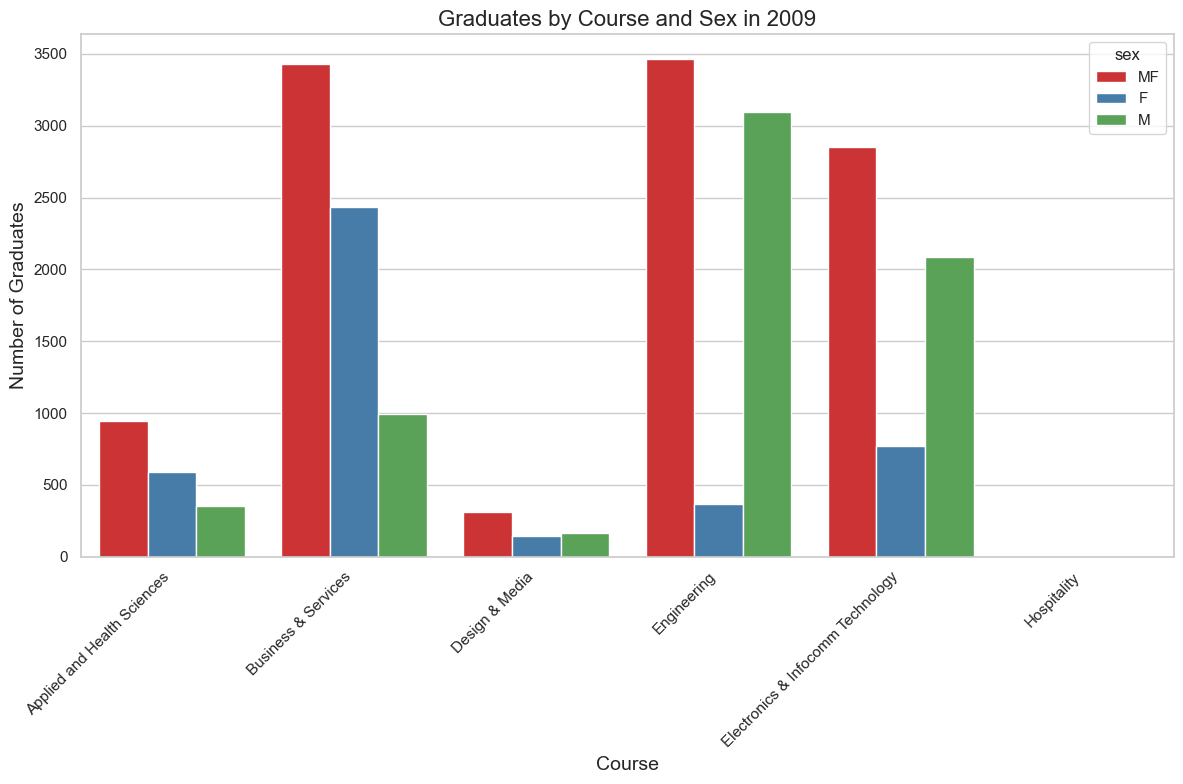

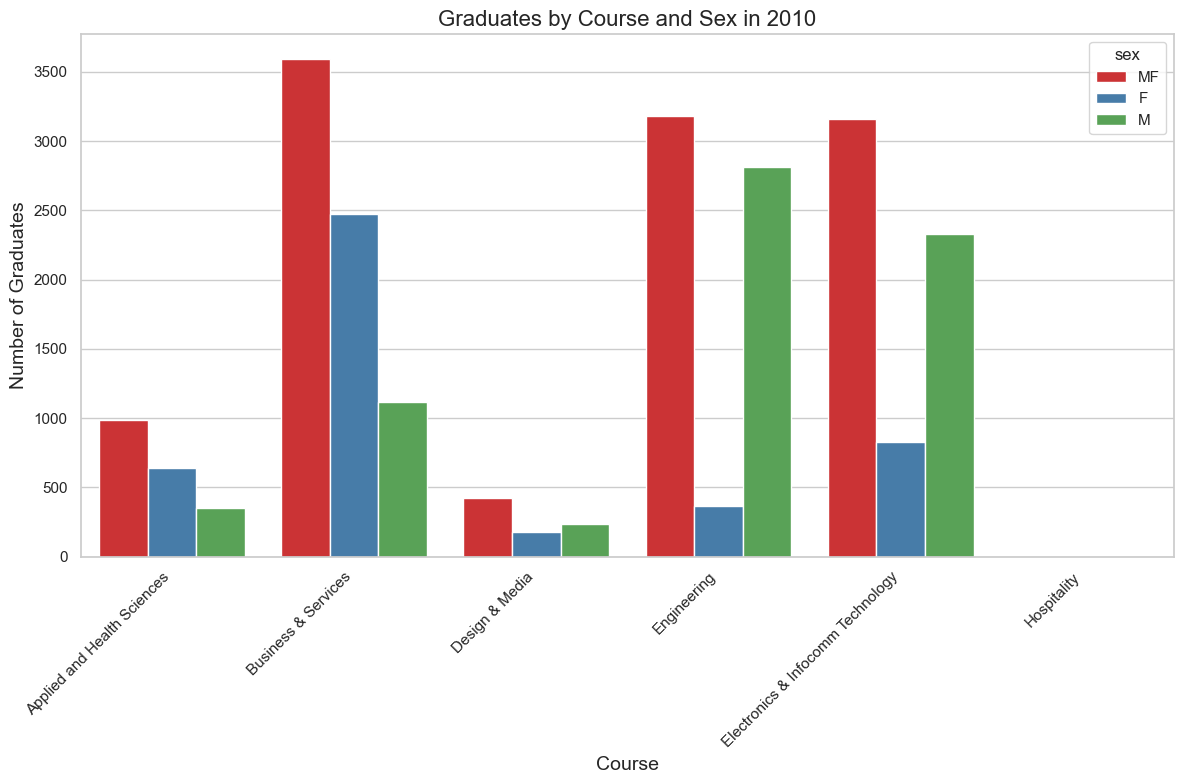

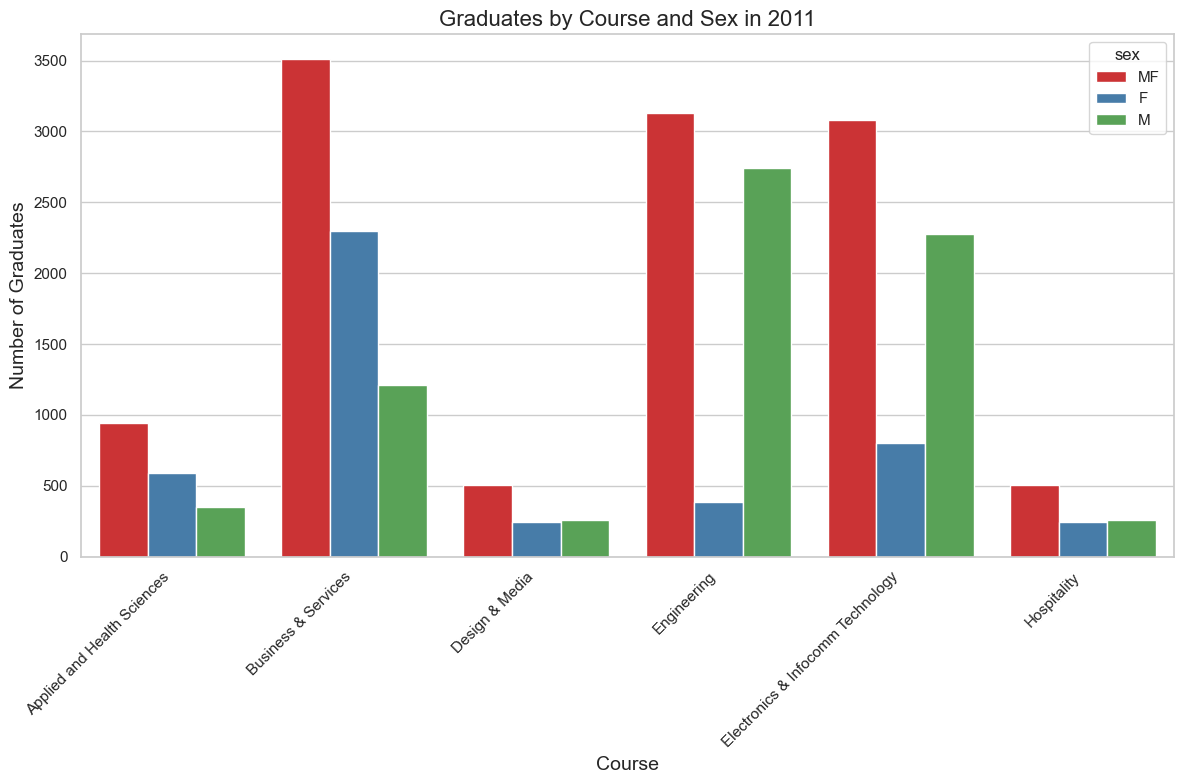

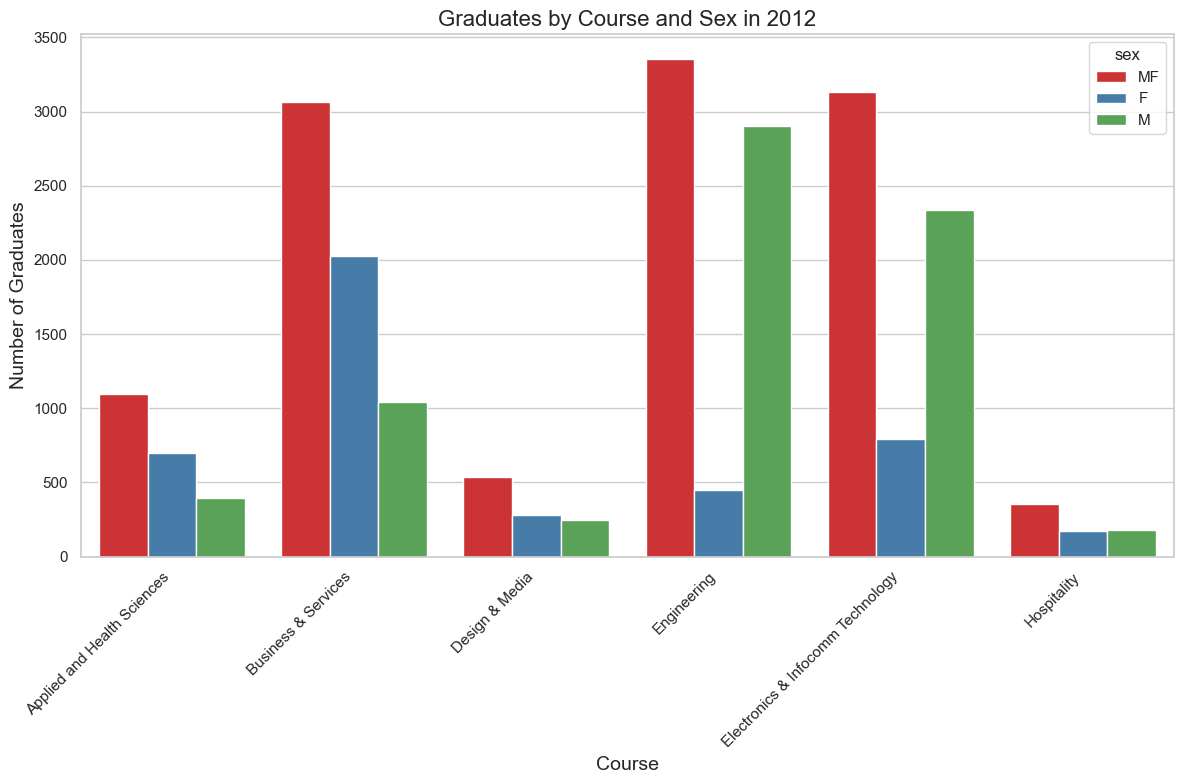

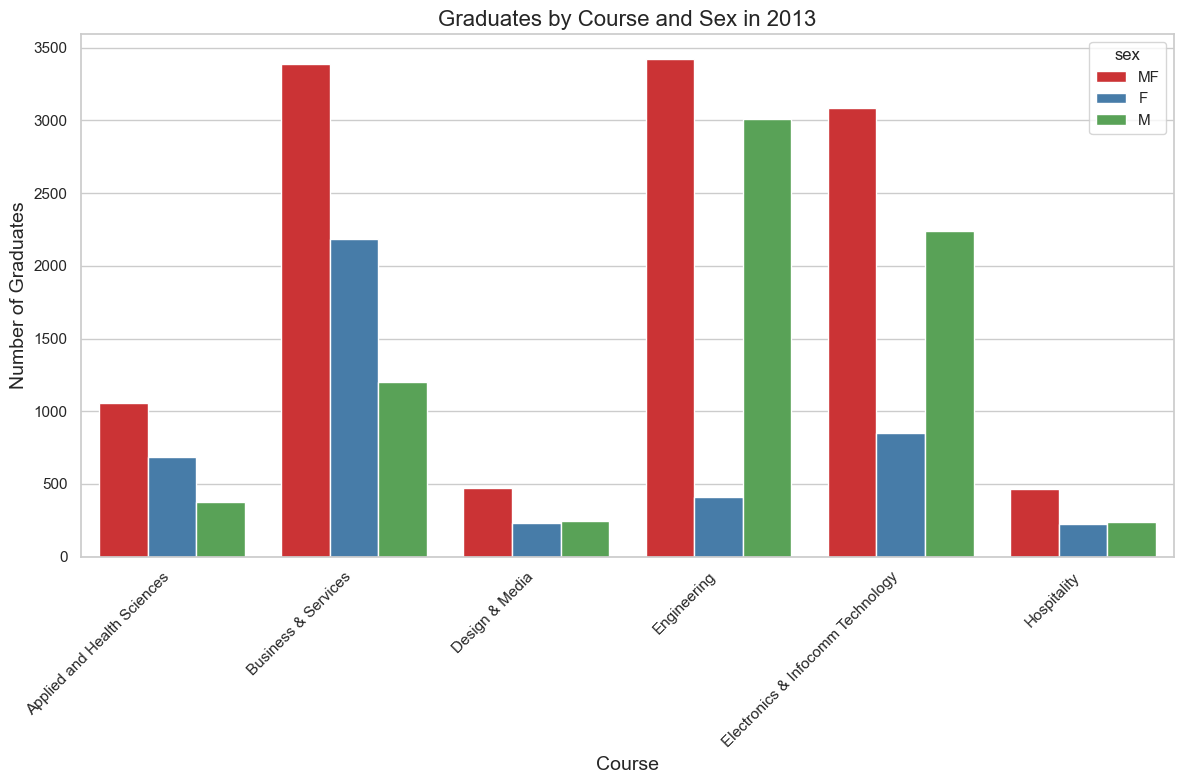

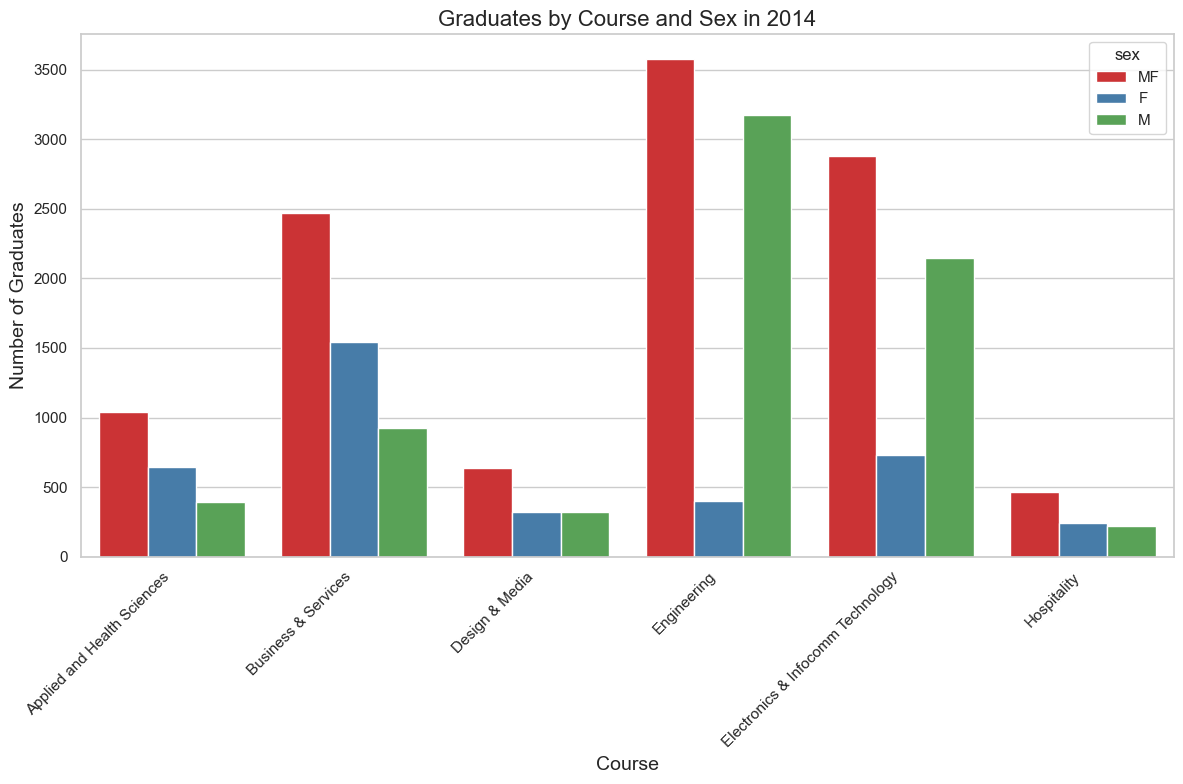

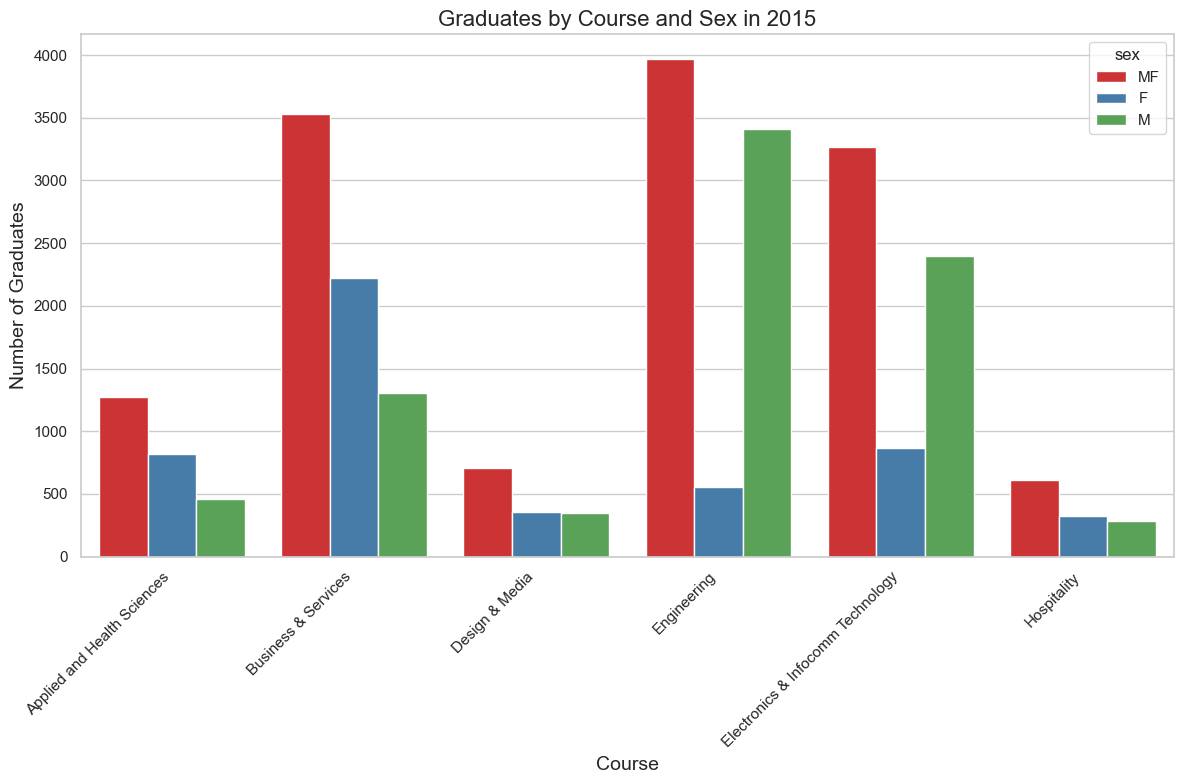

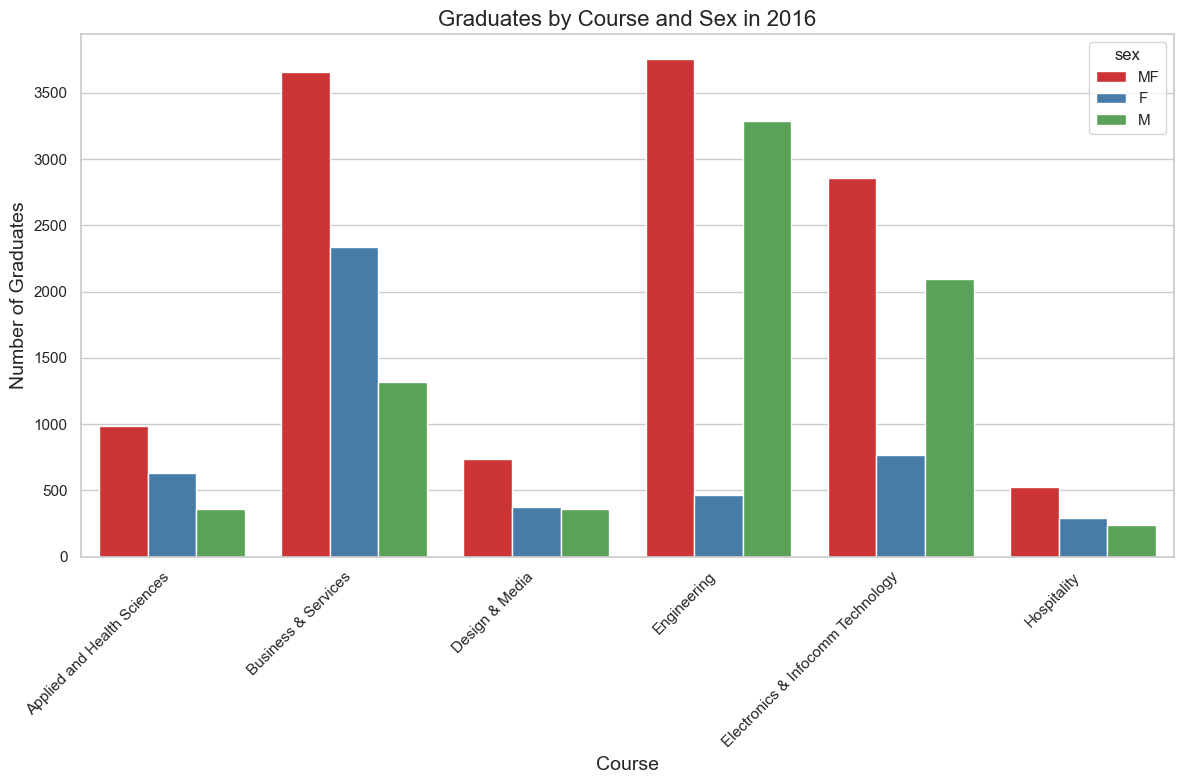

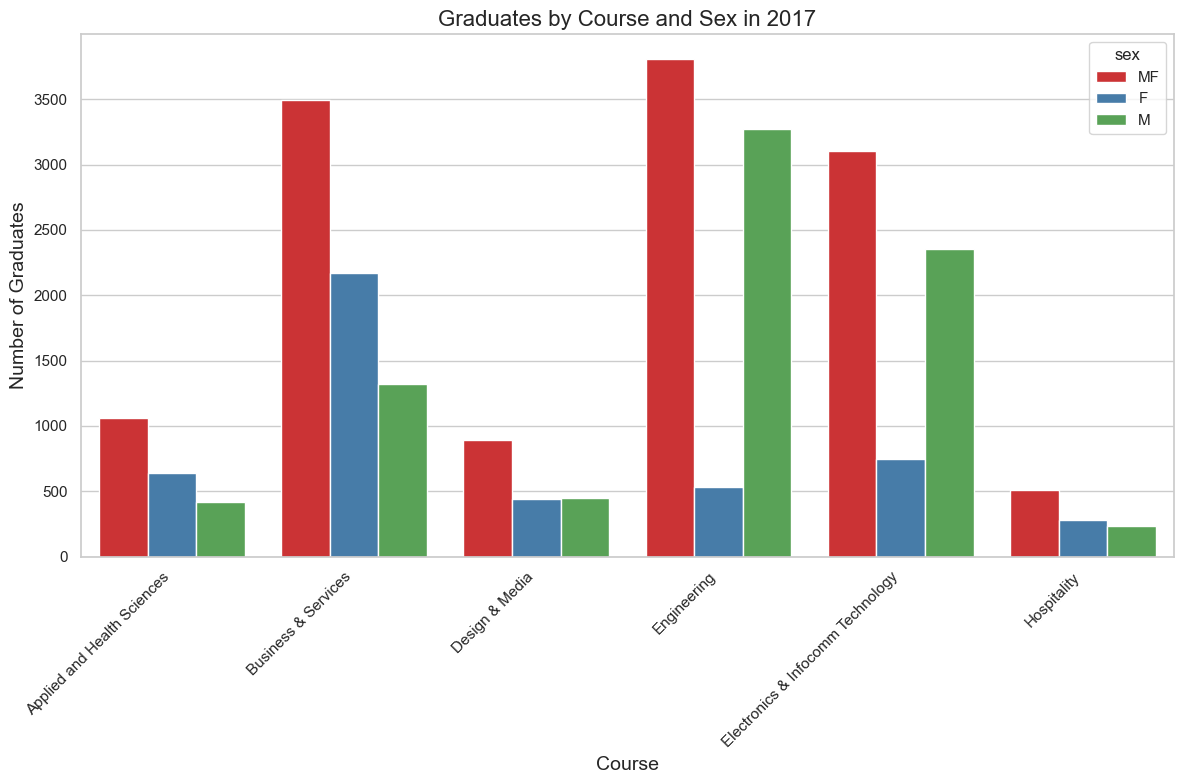

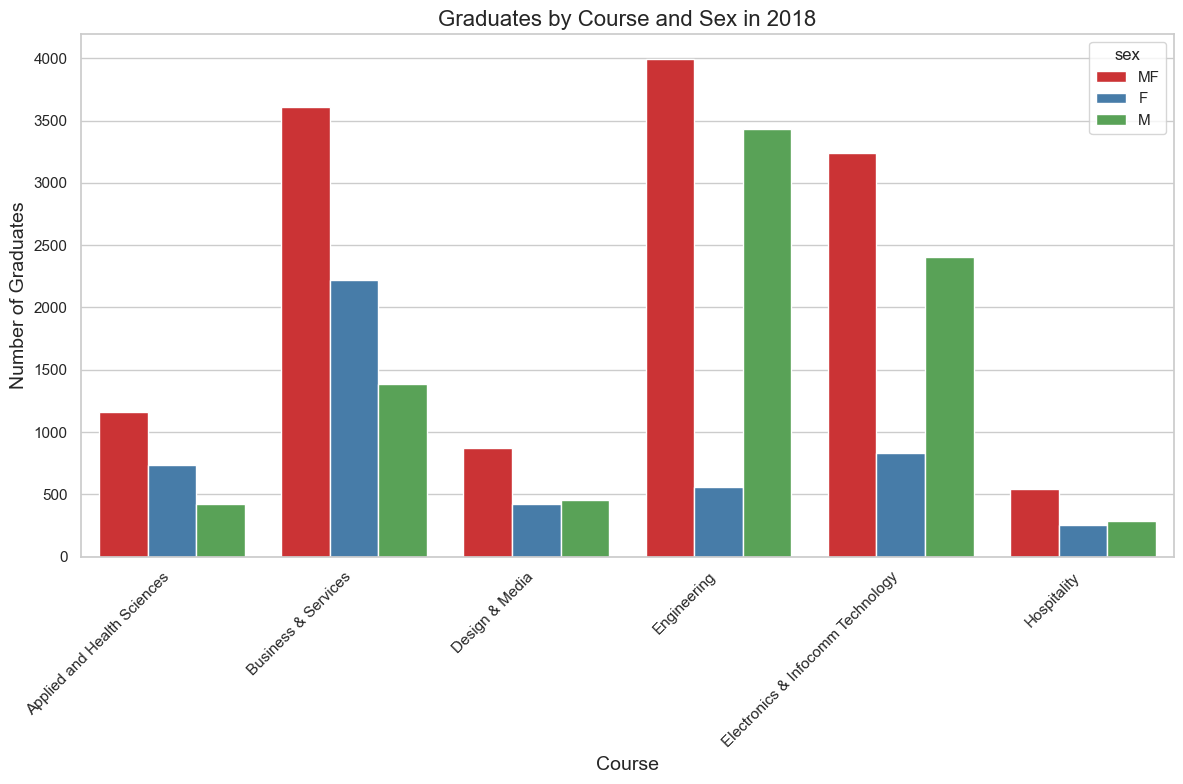

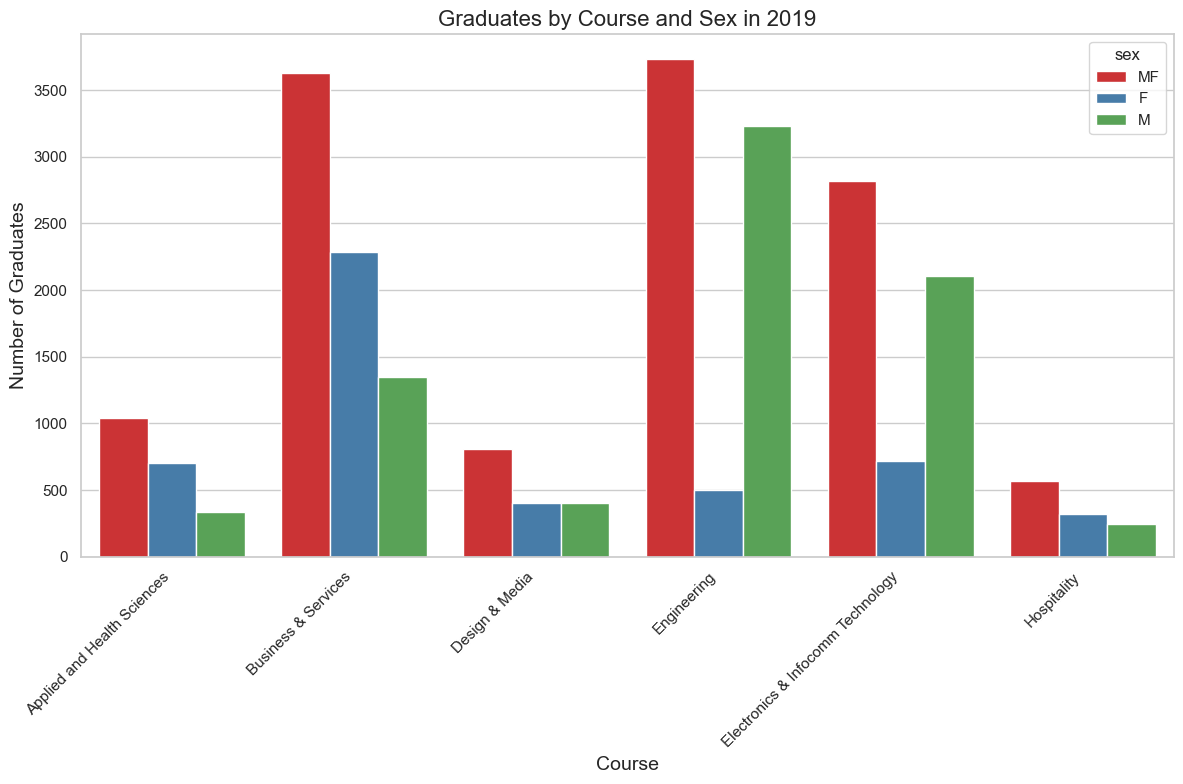

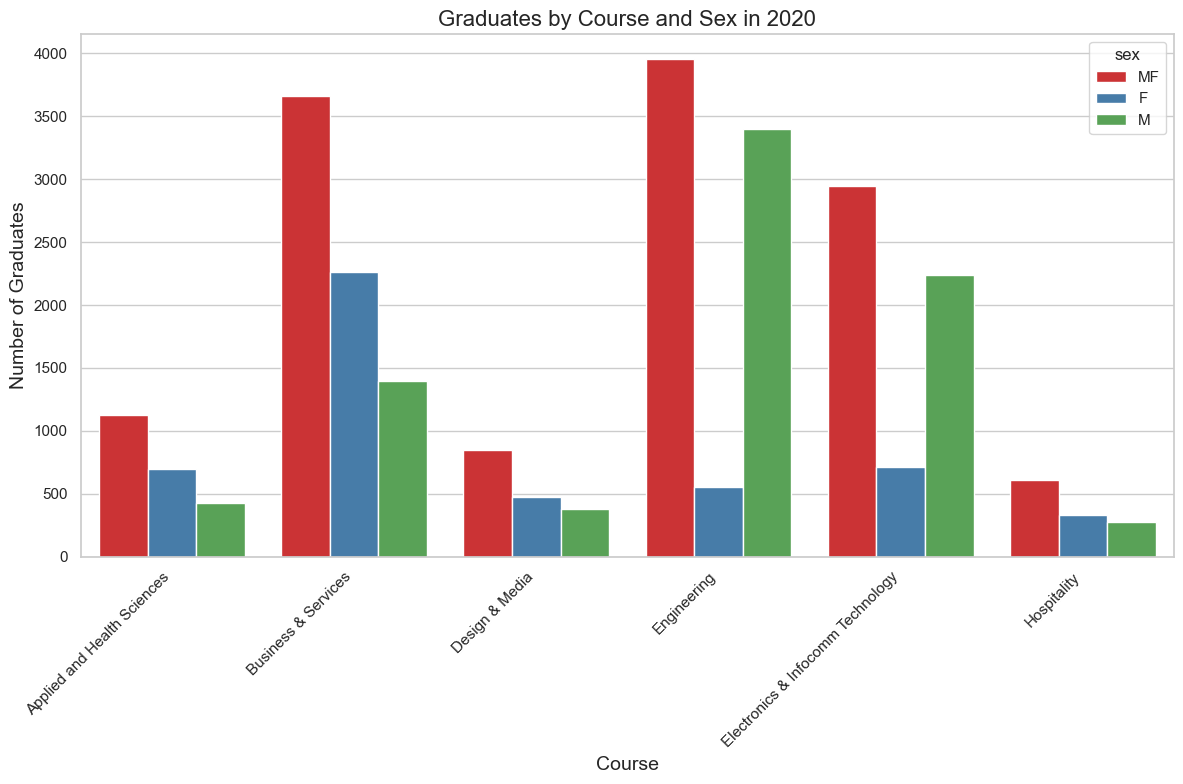

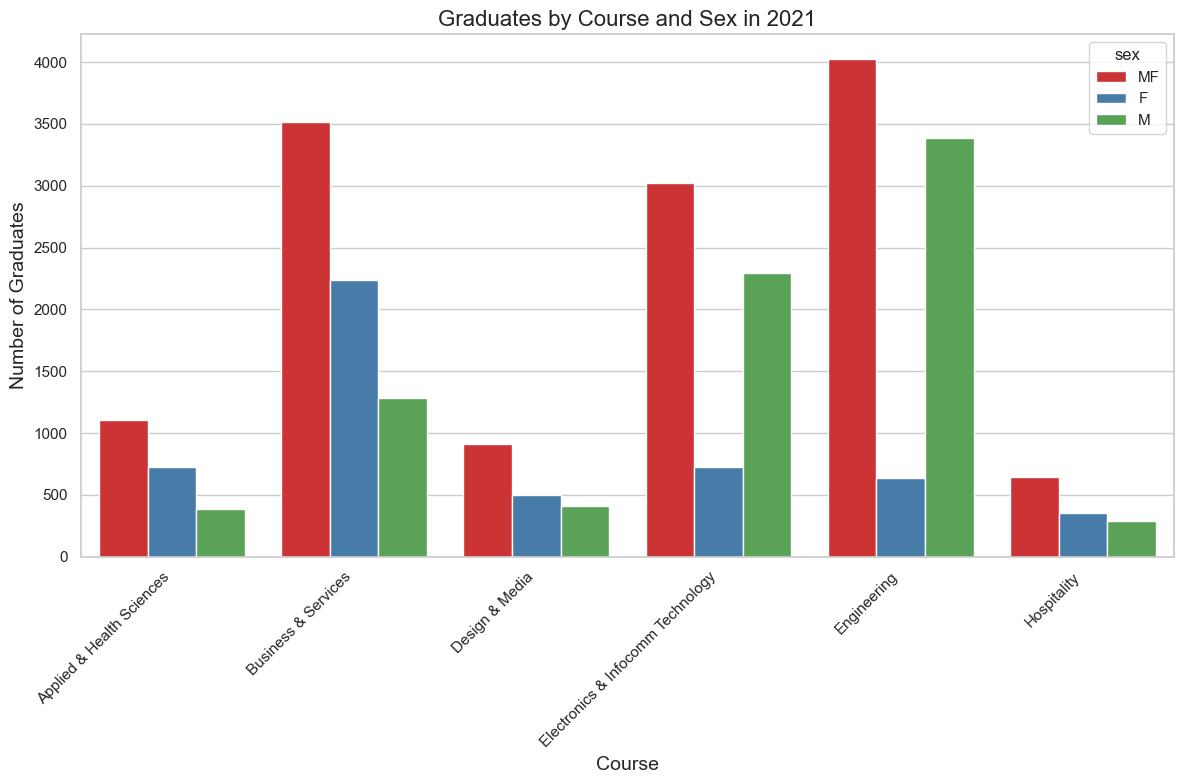

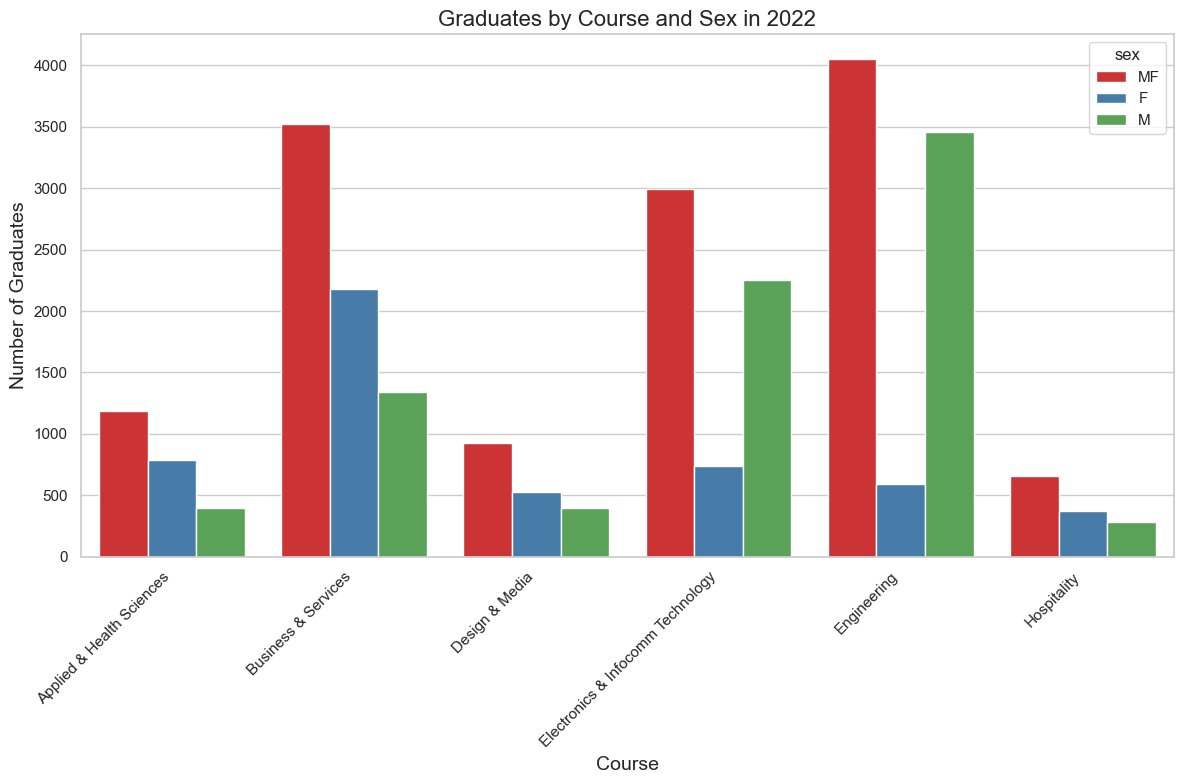

In [6]:
# Iterate over each year to create bar charts
for year in years:
    # Filter data for the specific year
    data_year = data[data['year'] == year]

    # Melt the data to have only graduates as a variable
    data_melted = pd.melt(data_year, id_vars=['course', 'sex'], value_vars=['graduates'],
                          var_name='Category', value_name='Count')

    # Create a bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x='course', y='Count', hue='sex', data=data_melted, palette='Set1', errorbar=None)

    # Set the title and labels
    plt.title(f'Graduates by Course and Sex in {year}', fontsize=16)
    plt.xlabel('Course', fontsize=14)
    plt.ylabel('Number of Graduates', fontsize=14)
    plt.xticks(rotation=45, ha="right")

    # Save the plot as a JPEG file
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'graduate_{year}.jpg'), format='jpg', dpi=300)

    # Show the plot
    plt.tight_layout()
    plt.show()

## Step 6 - Plot the bar charts - for Dropouts, Repeat Students, Deferred Students

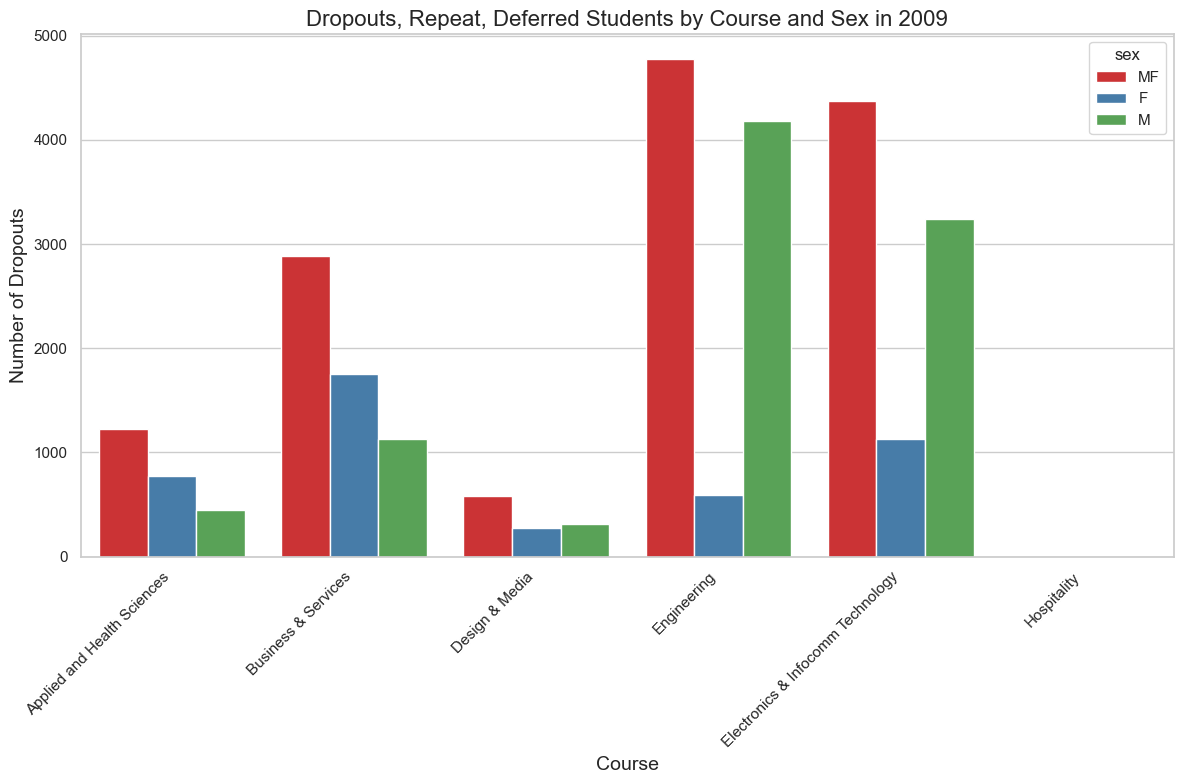

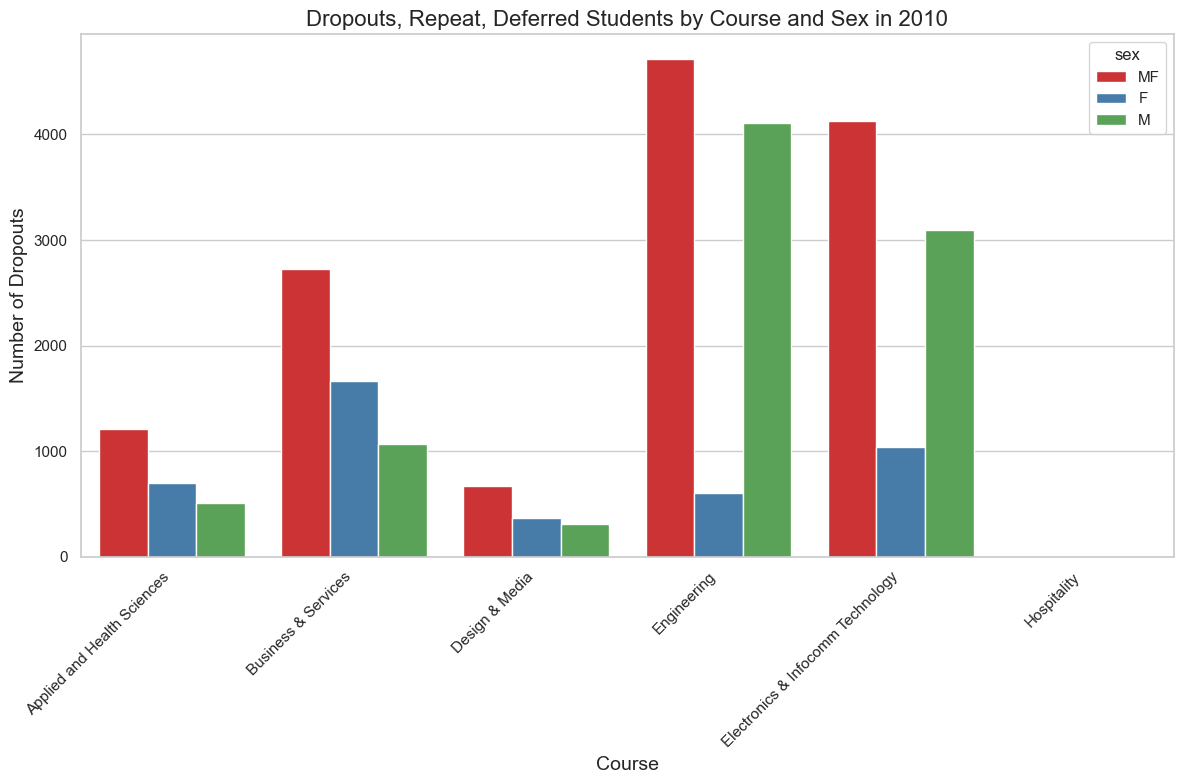

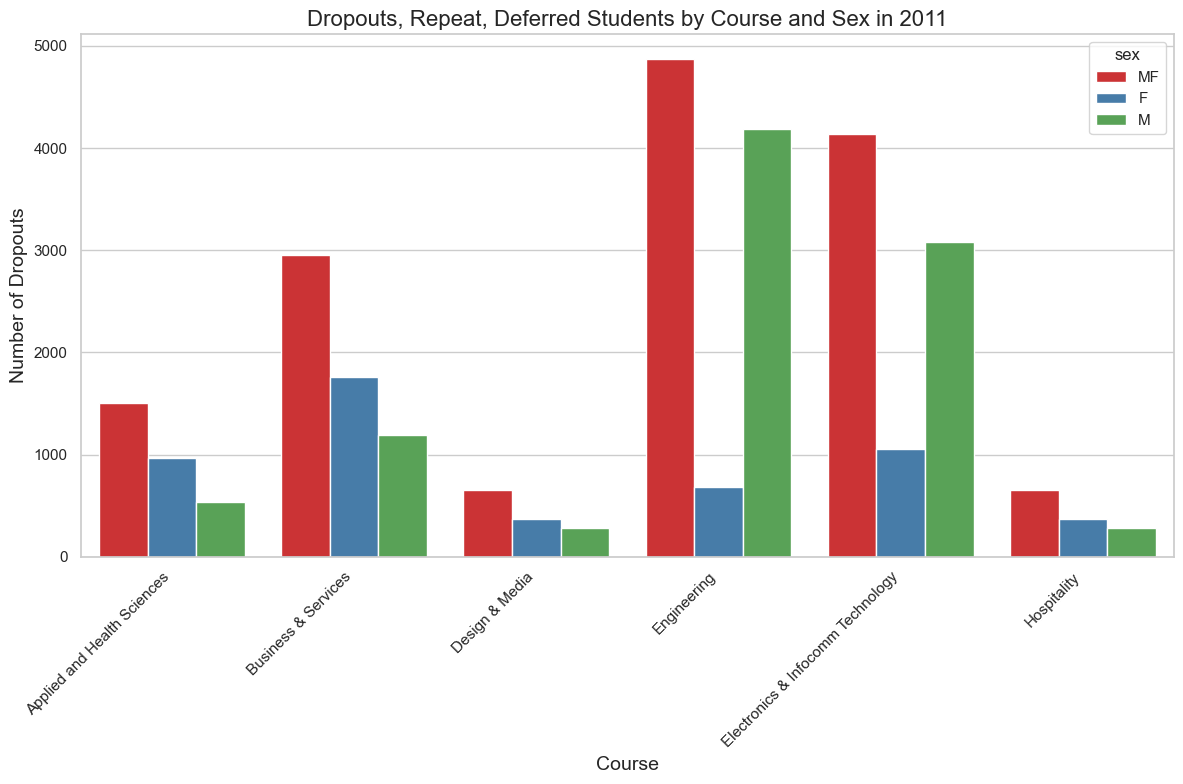

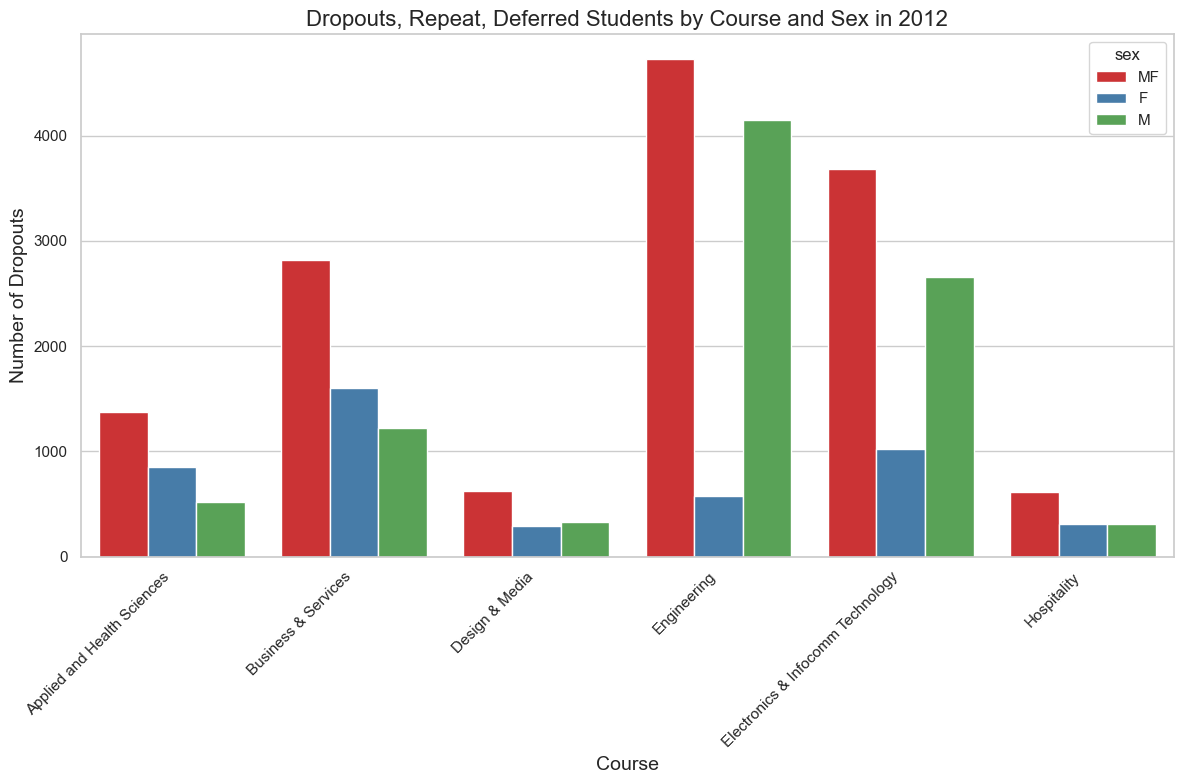

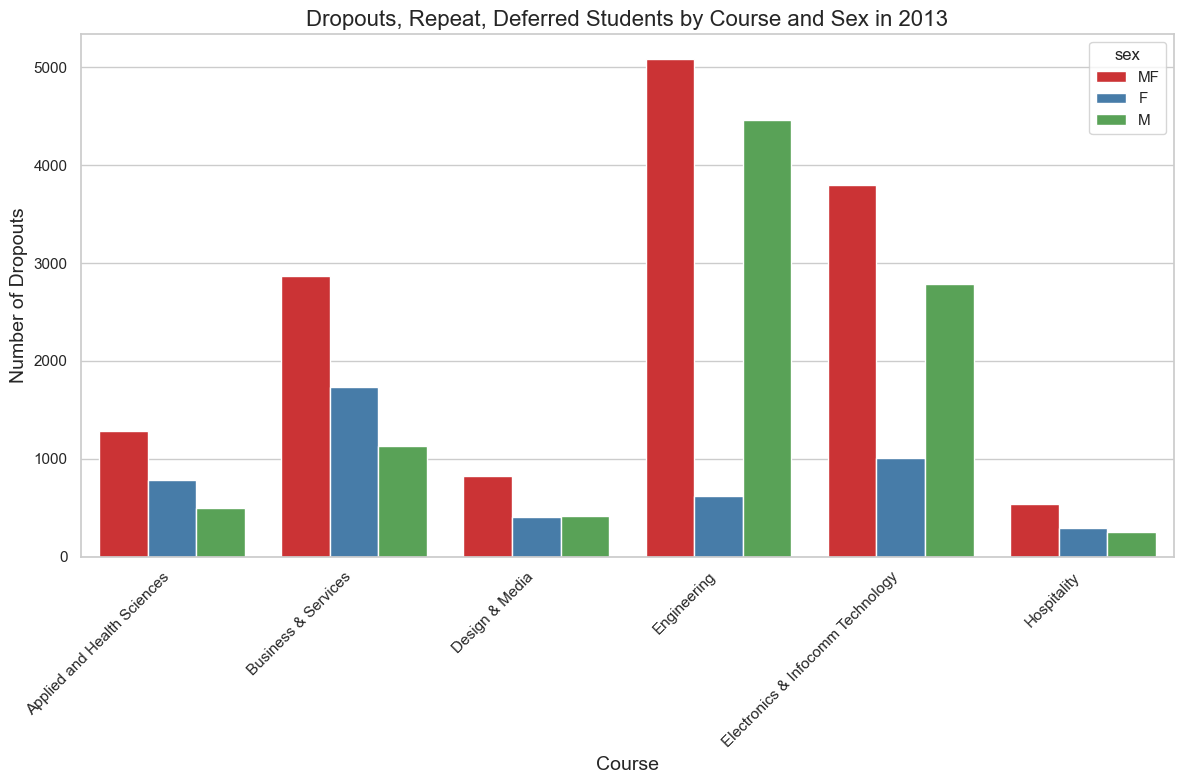

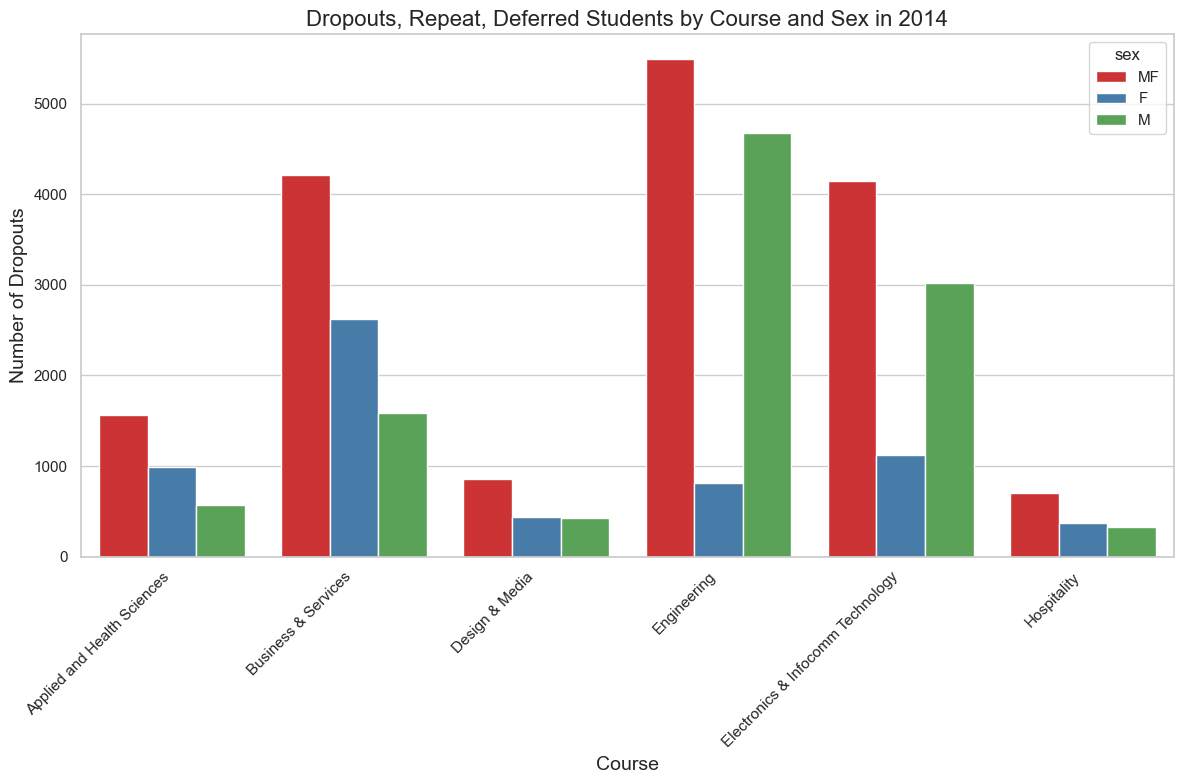

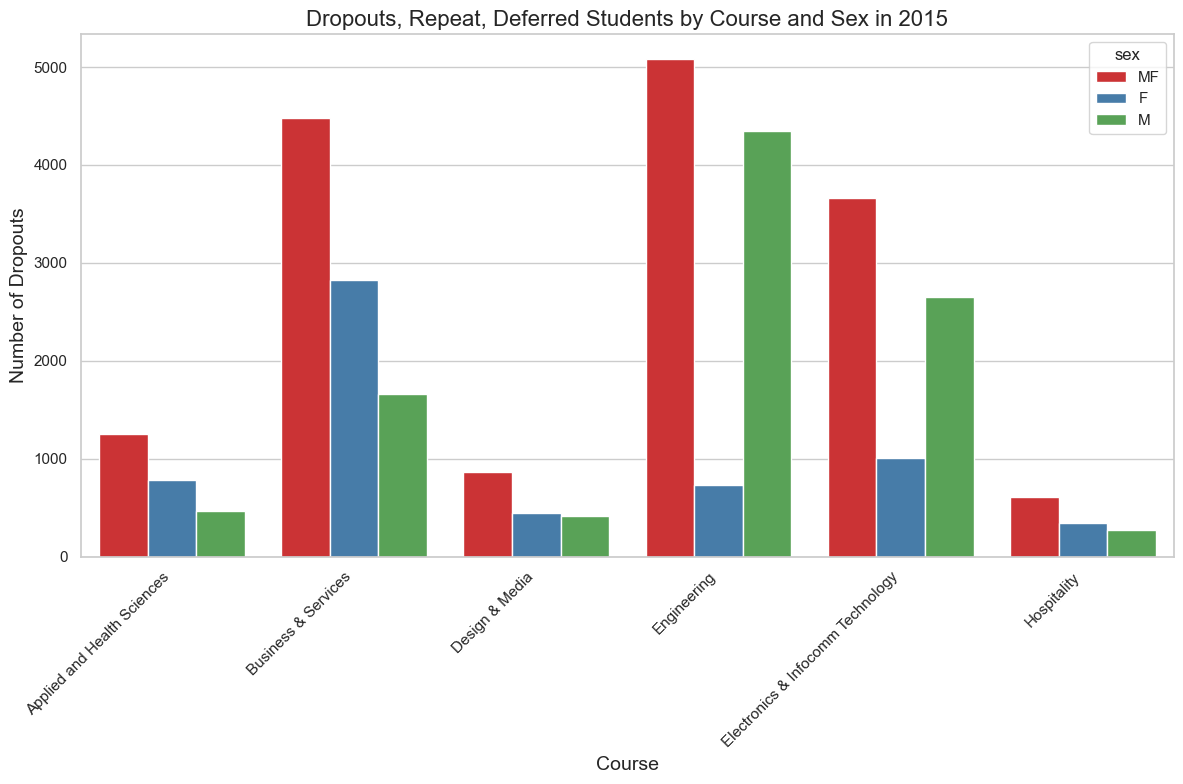

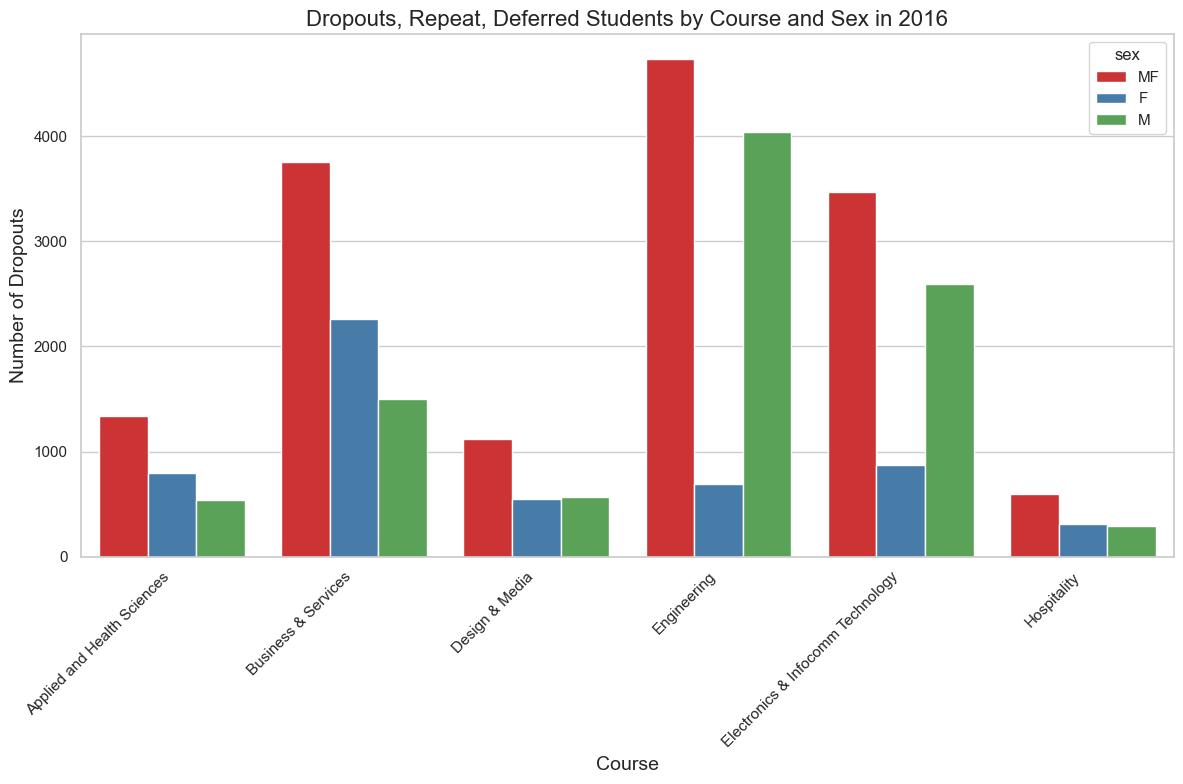

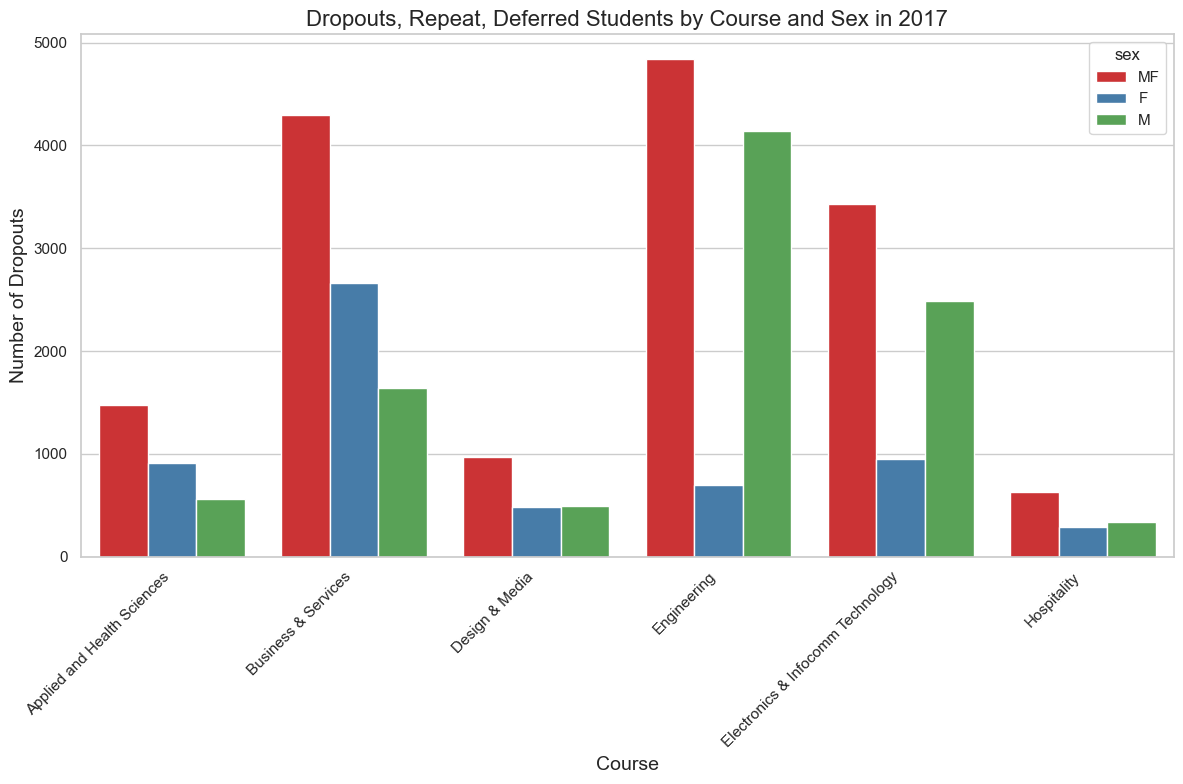

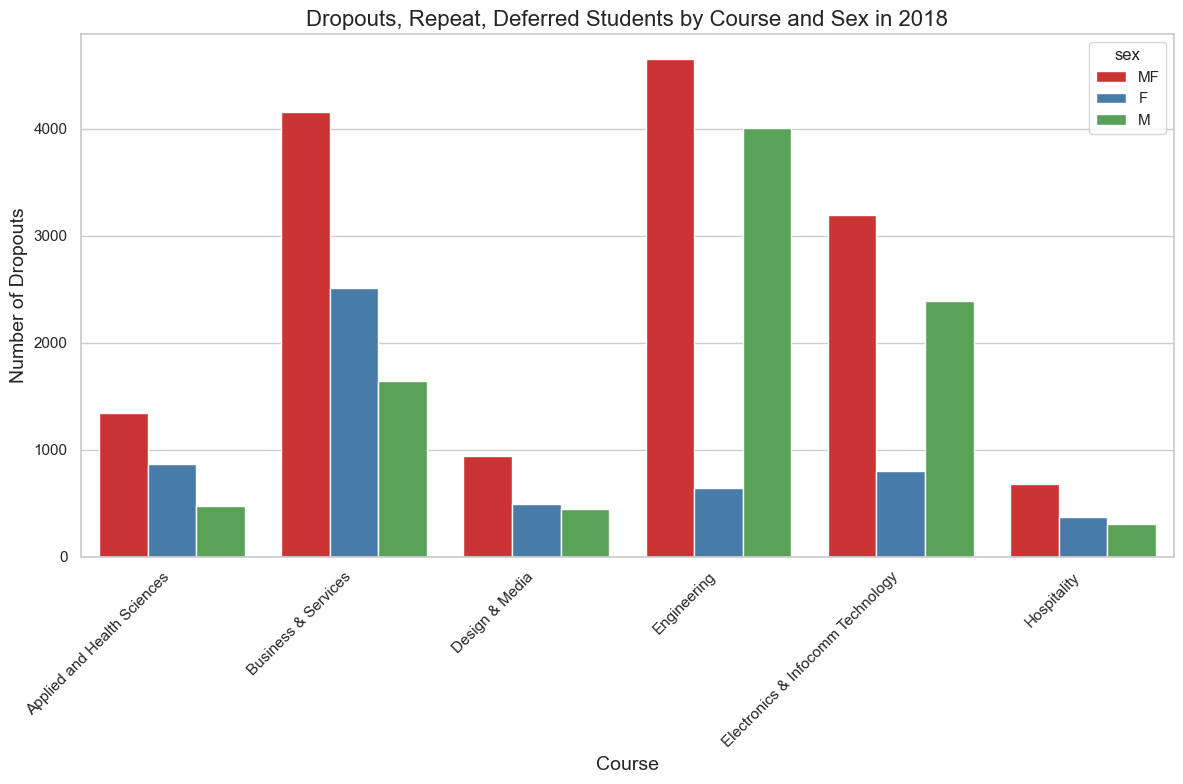

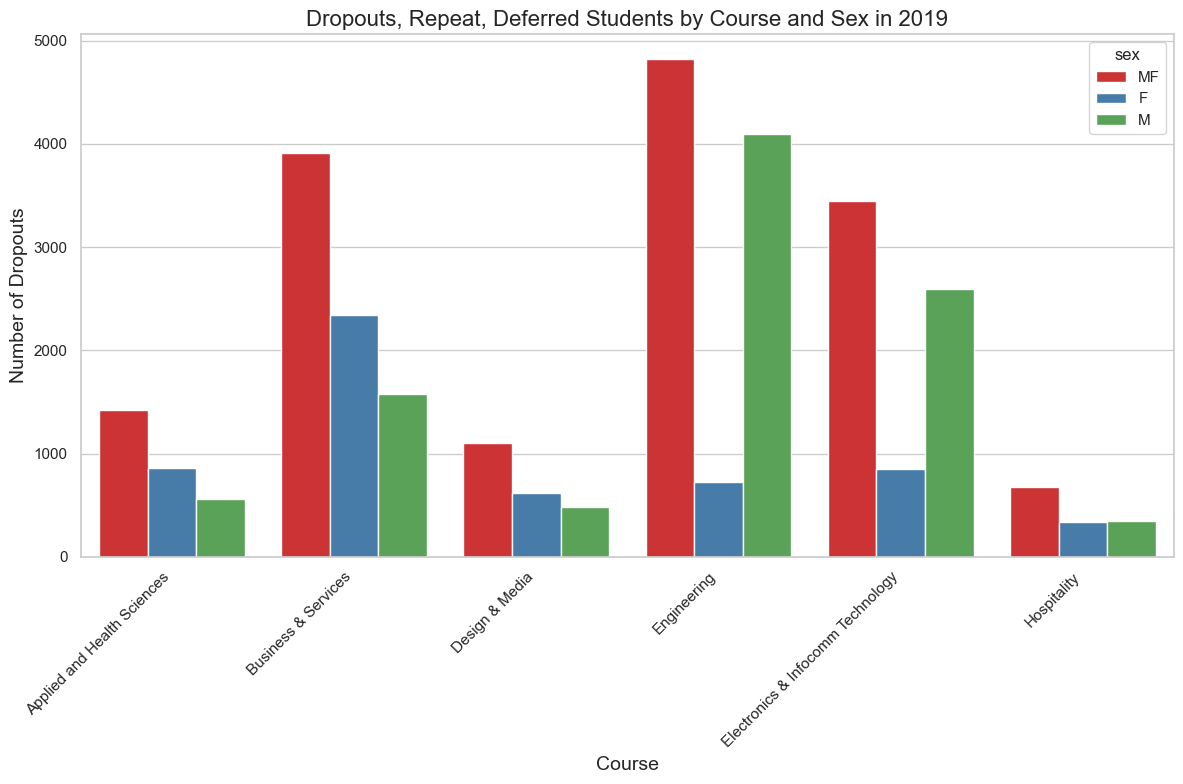

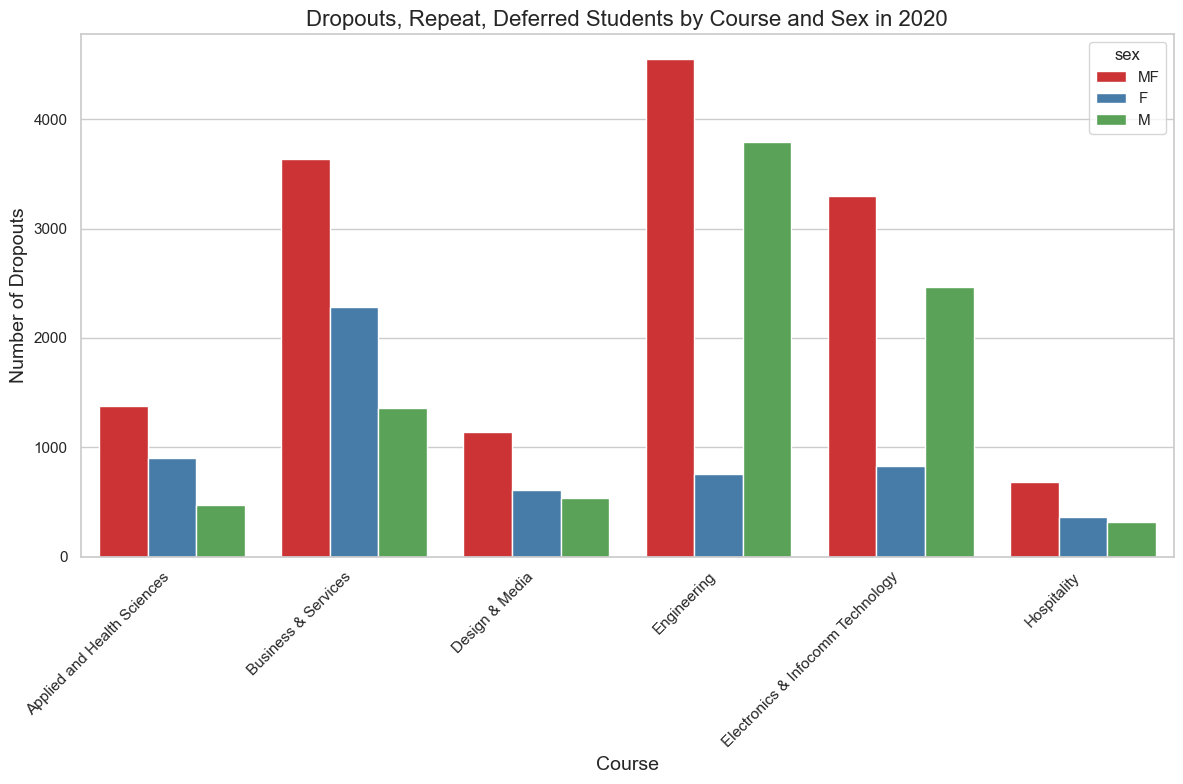

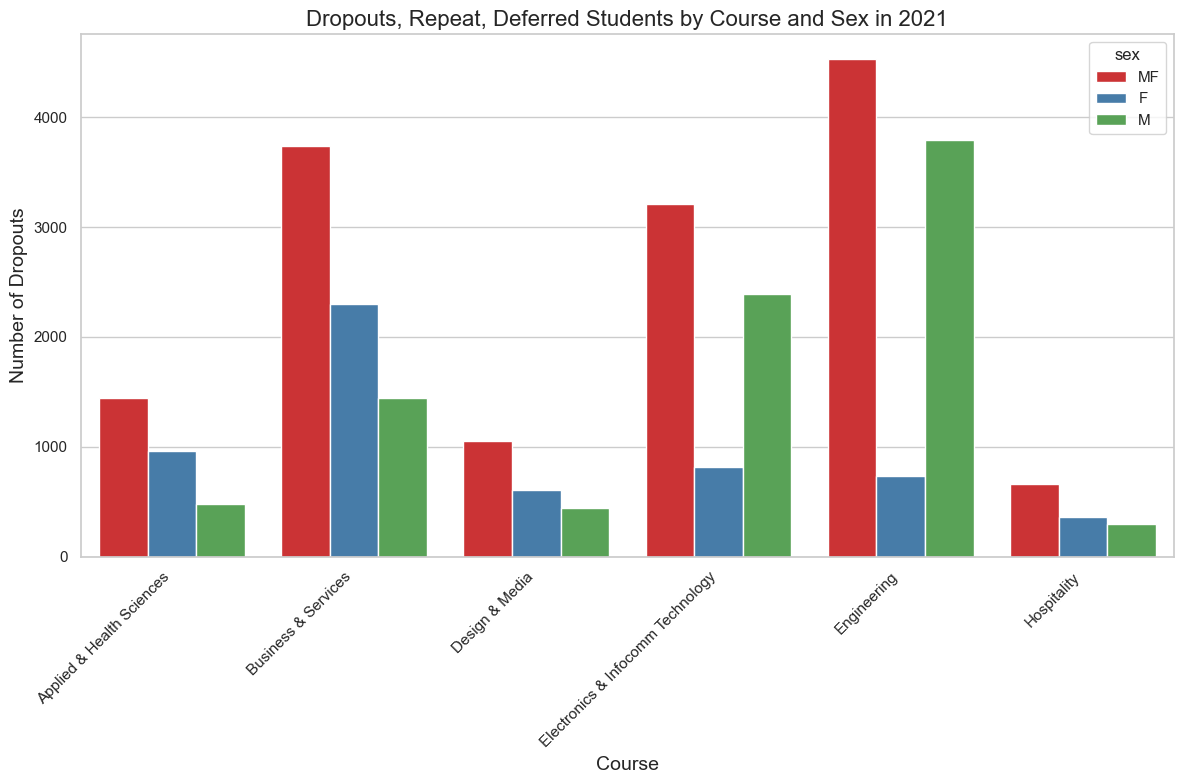

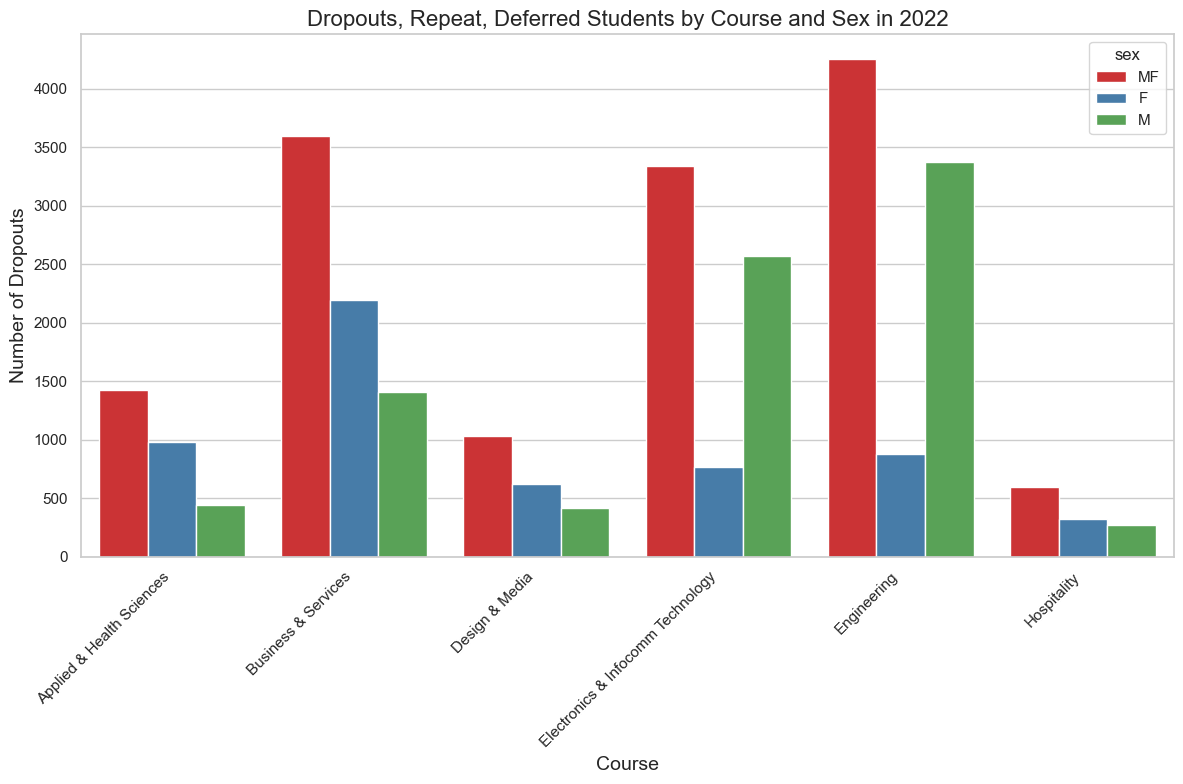

In [5]:
# Calculate the dropouts (enrolment - graduates)
data['dropouts'] = data['enrolment'] - data['graduates']

# Iterate over each year to create bar charts
for year in years:
    # Filter data for the specific year
    data_year = data[data['year'] == year]

    # Melt the data to have only dropouts as a variable
    data_melted = pd.melt(data_year, id_vars=['course', 'sex'], value_vars=['dropouts'],
                          var_name='Category', value_name='Count')

    # Create a bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x='course', y='Count', hue='sex', data=data_melted, palette='Set1', errorbar=None)

    # Set the title and labels
    plt.title(f'Dropouts, Repeat, Deferred Students by Course and Sex in {year}', fontsize=16)
    plt.xlabel('Course', fontsize=14)
    plt.ylabel('Number of Dropouts', fontsize=14)
    plt.xticks(rotation=45, ha="right")

    # Save the plot as a JPEG file
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'dropouts_{year}.jpg'), format='jpg', dpi=300)

    # Show the plot
    plt.tight_layout()
    plt.show()
